In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

# Load your DataFrame
df = pd.read_csv('Road Accident Data.csv')

# Create the ProfileReport object
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Save the report to an HTML file
profile.to_file('Road_Accident_Data_profile.html')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv("Road Accident Data.csv")


In [9]:
na_values = ['‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’']
data = pd.read_csv("Road Accident Data.csv", na_values=na_values)

In [3]:
with open('Road Accident Data.csv', 'r') as f:
    data = f.read().replace('None', 'UniqueNoneIdentifier')

with open('temp.csv', 'w') as f:
    f.write(data)

df = pd.read_csv('temp.csv')
df = df.replace('UniqueNoneIdentifier', 'None')

## Basic analysis

In [4]:
print("Shape of the data is: ",data.shape)  
print("Columns present in the data are: ",data.columns)

Shape of the data is:  (307973, 21)
Columns present in the data are:  Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')


In [11]:
df['Time']

0         15:11
1         10:59
2         14:19
3         08:10
4         17:25
          ...  
307968    07:00
307969    03:00
307970    09:38
307971    18:25
307972    15:45
Name: Time, Length: 307973, dtype: object

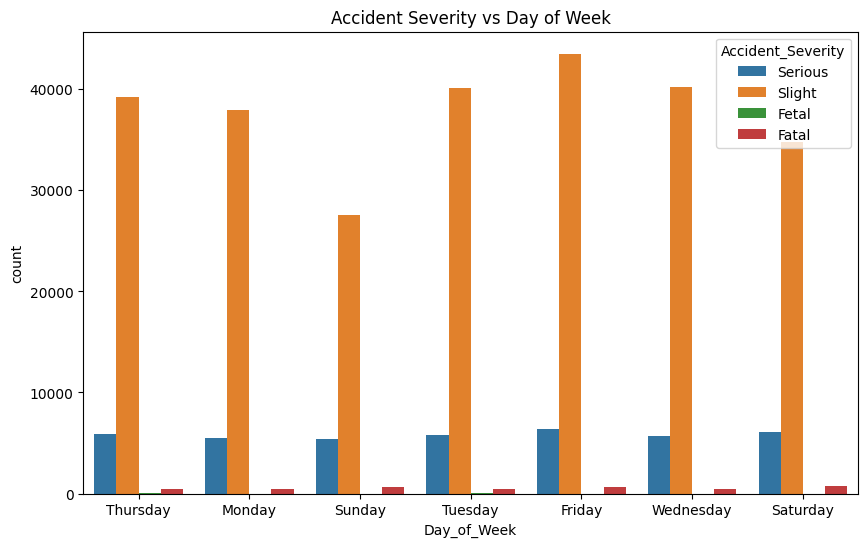

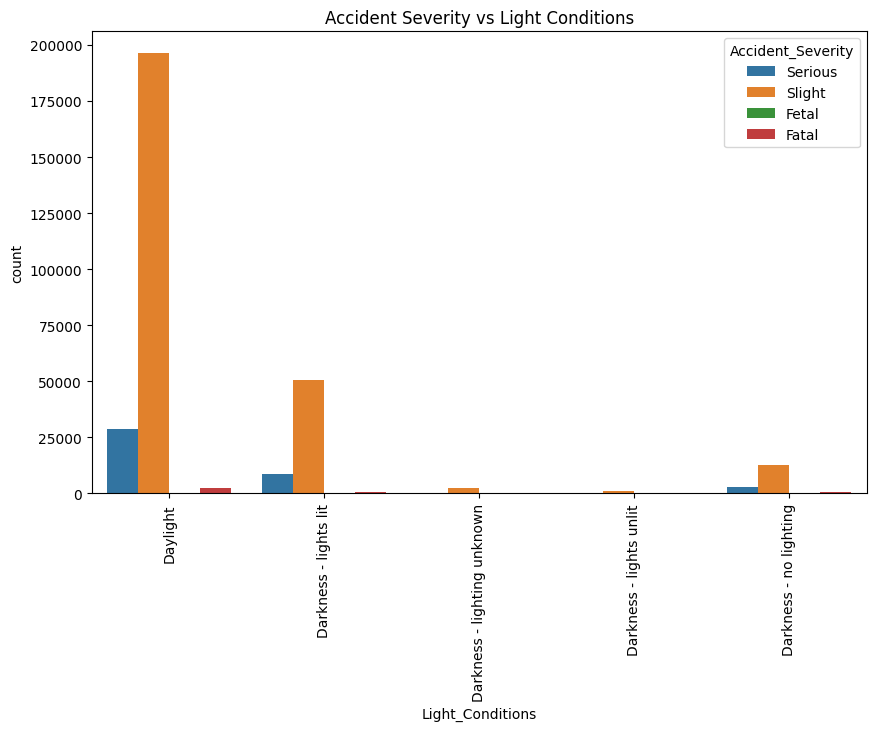

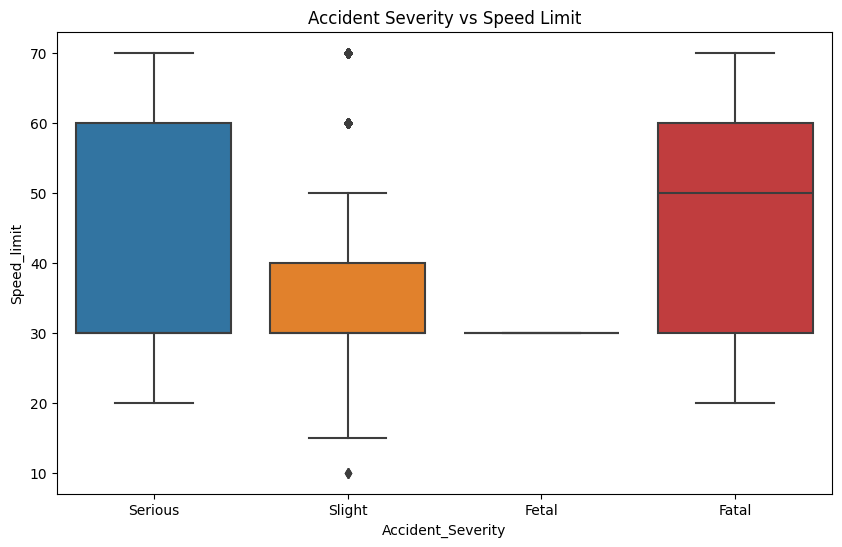

In [5]:
#df.info()
import seaborn as sns
import matplotlib.pyplot as plt

# Accident Severity vs Day of Week
plt.figure(figsize=(10,6))
sns.countplot(x='Day_of_Week', hue='Accident_Severity', data=df)
plt.title('Accident Severity vs Day of Week')
plt.show()

# Accident Severity vs Light Conditions
plt.figure(figsize=(10,6))
sns.countplot(x='Light_Conditions', hue='Accident_Severity', data=df)
plt.title('Accident Severity vs Light Conditions')
plt.xticks(rotation=90)
plt.show()

# Accident Severity vs Speed Limit
plt.figure(figsize=(10,6))
sns.boxplot(x='Accident_Severity', y='Speed_limit', data=df)
plt.title('Accident Severity vs Speed Limit')
plt.show()

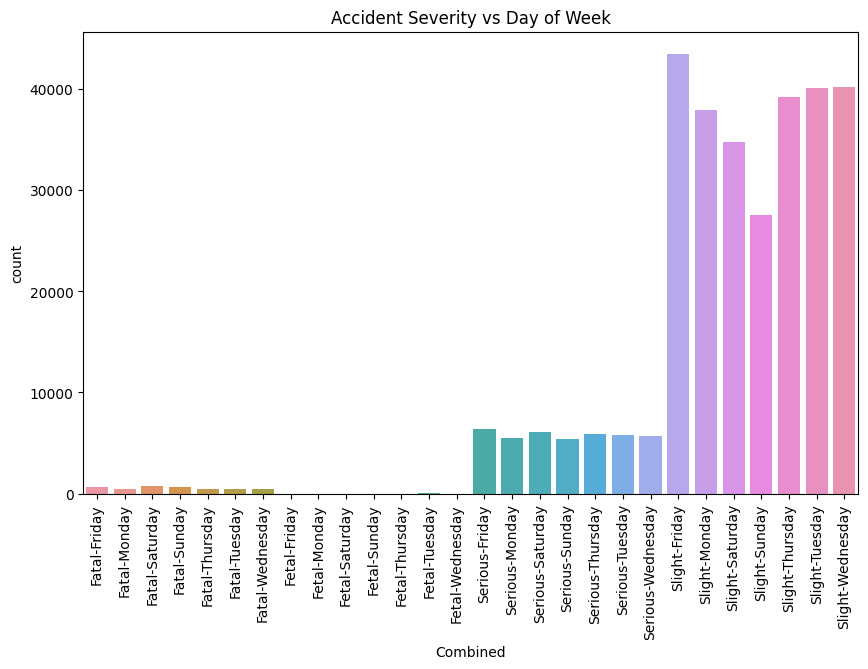

In [6]:
import pandas as pd

# Create a DataFrame with one row per combination of 'Day_of_Week' and 'Accident_Severity'
df_melted = pd.melt(df, id_vars=['Accident_Severity'], value_vars=['Day_of_Week'])

# Create a new column that combines 'Accident_Severity' and 'Day_of_Week'
df_melted['Combined'] = df_melted['Accident_Severity'] + '-' + df_melted['value']

# Create a count plot
plt.figure(figsize=(10,6))
sns.countplot(x='Combined', data=df_melted, order=sorted(df_melted['Combined'].unique()))
plt.title('Accident Severity vs Day of Week')
plt.xticks(rotation=90)
plt.show()

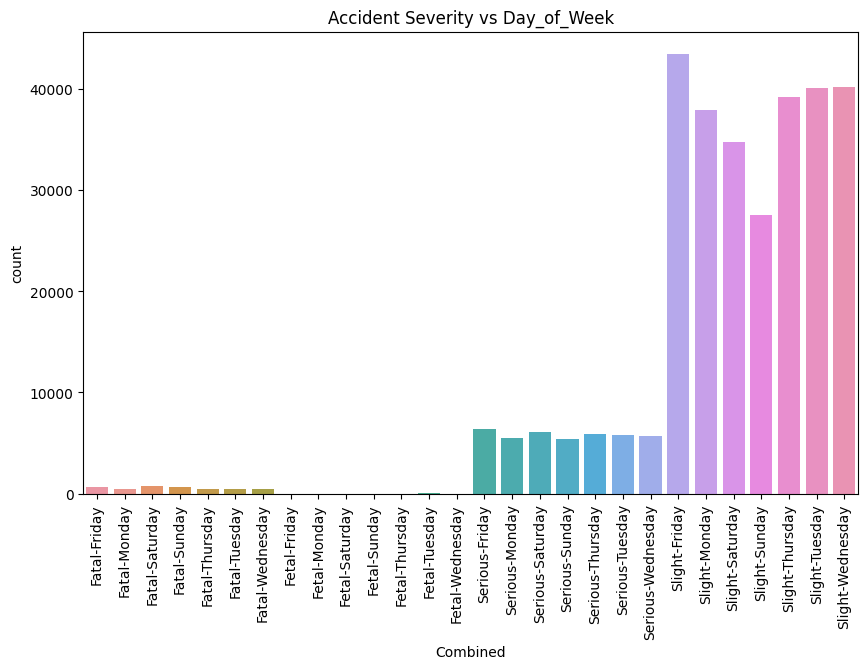

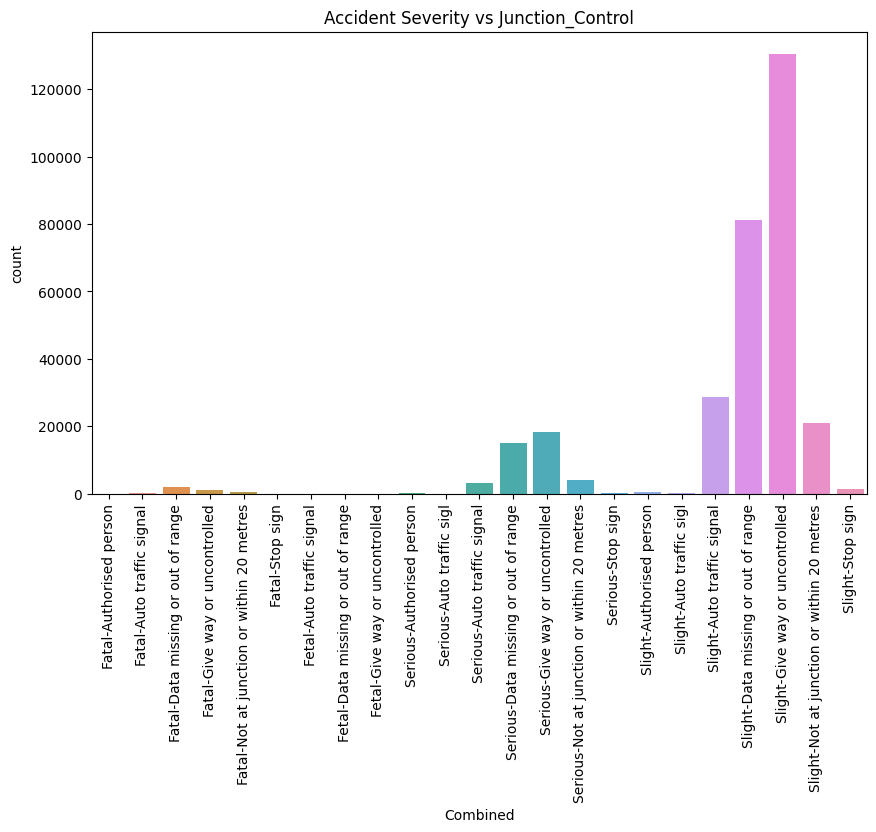

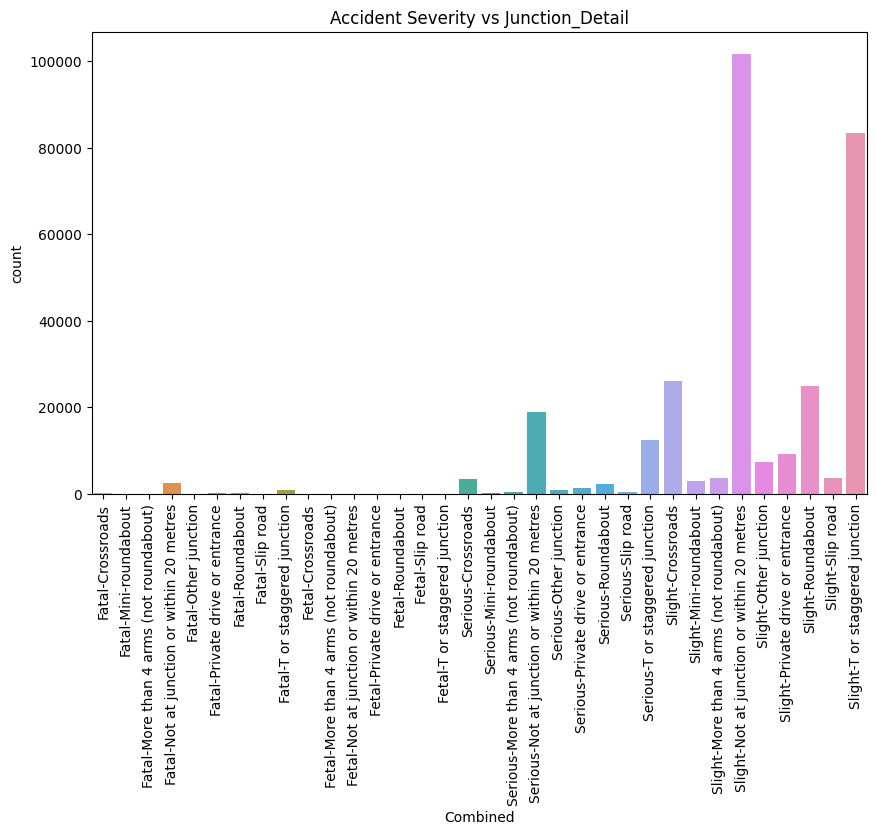

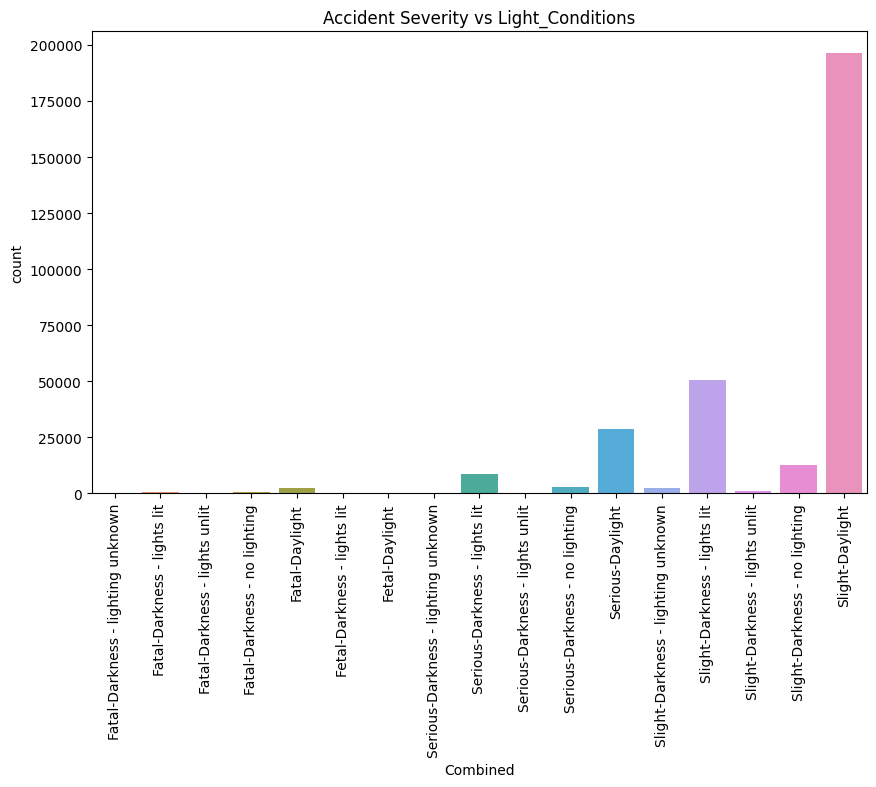

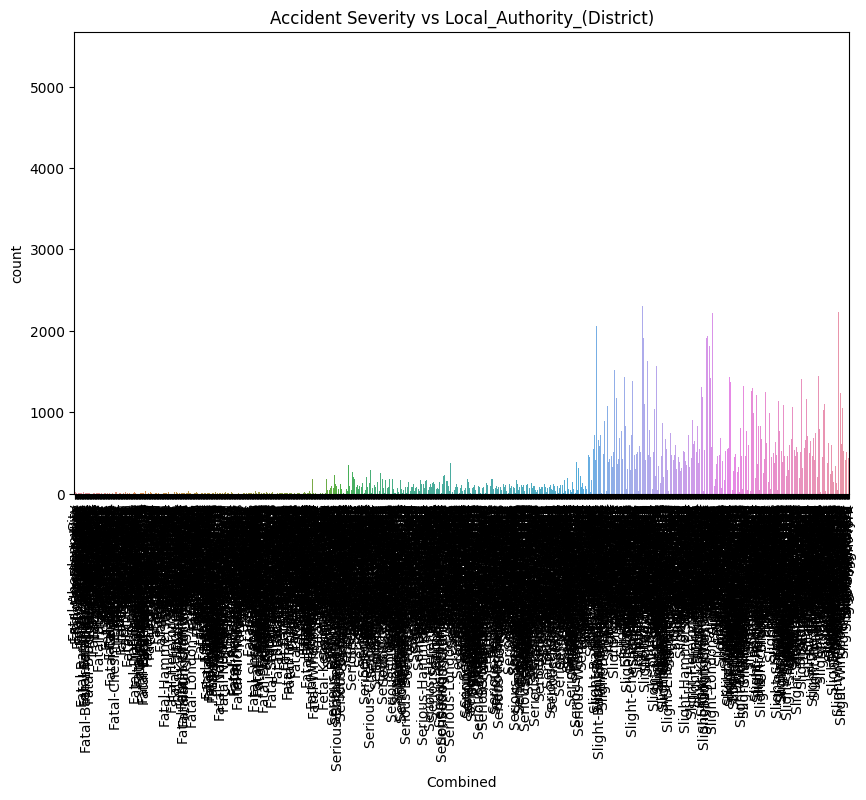

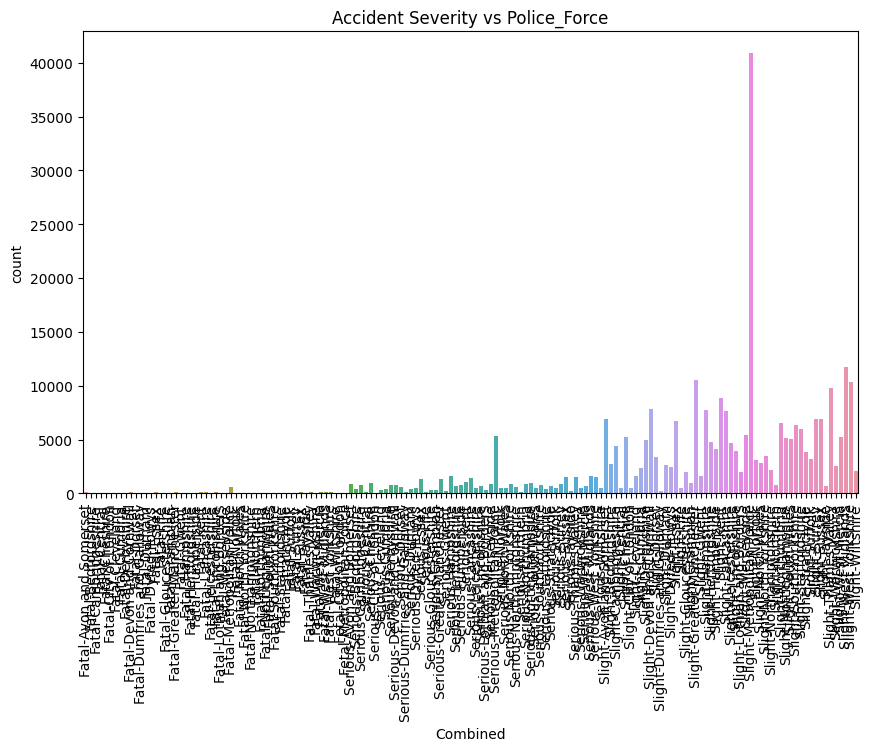

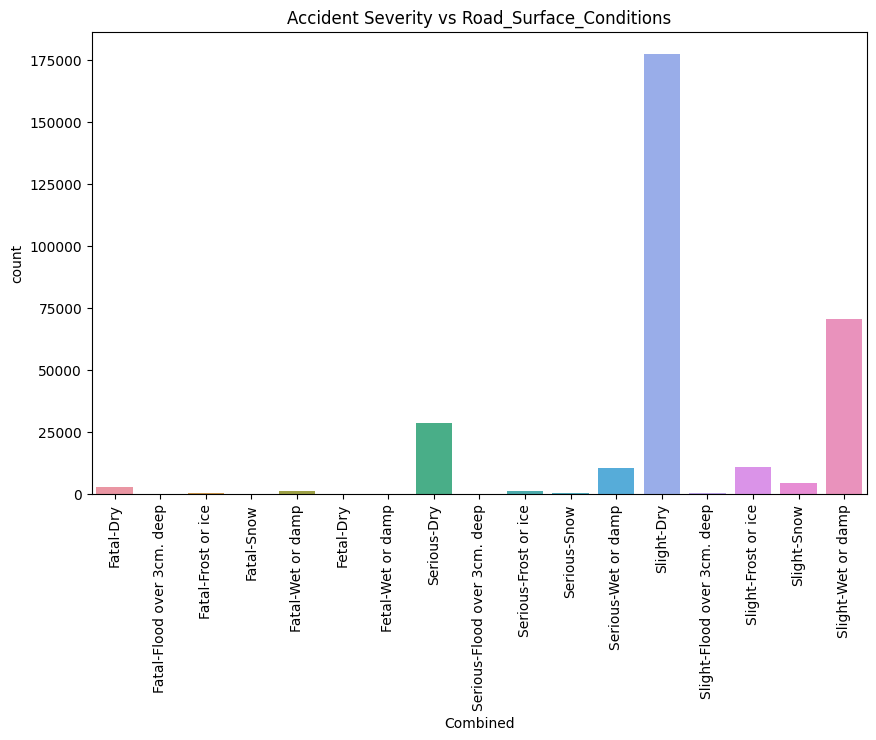

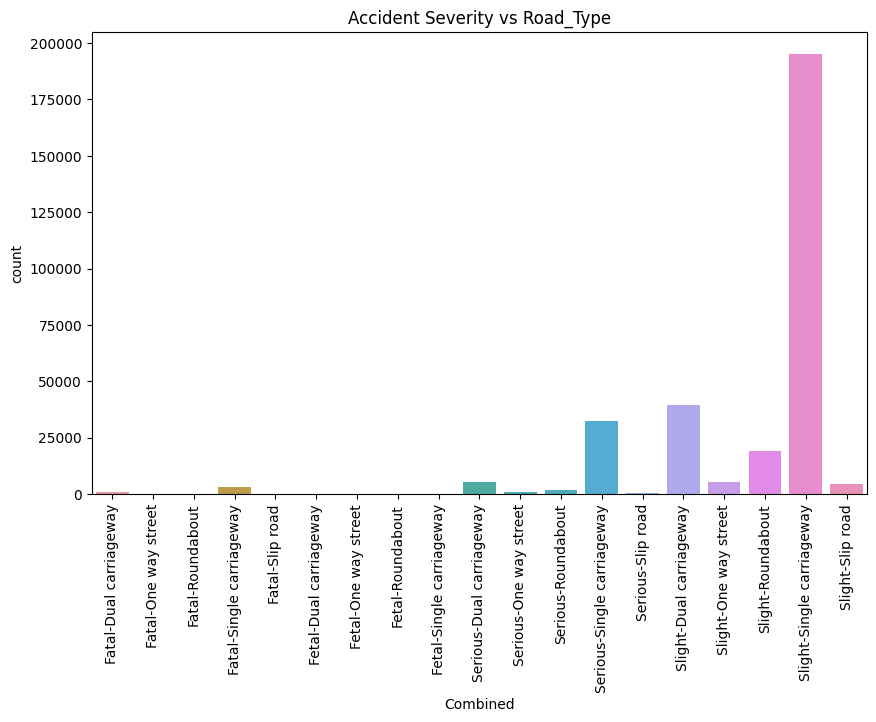

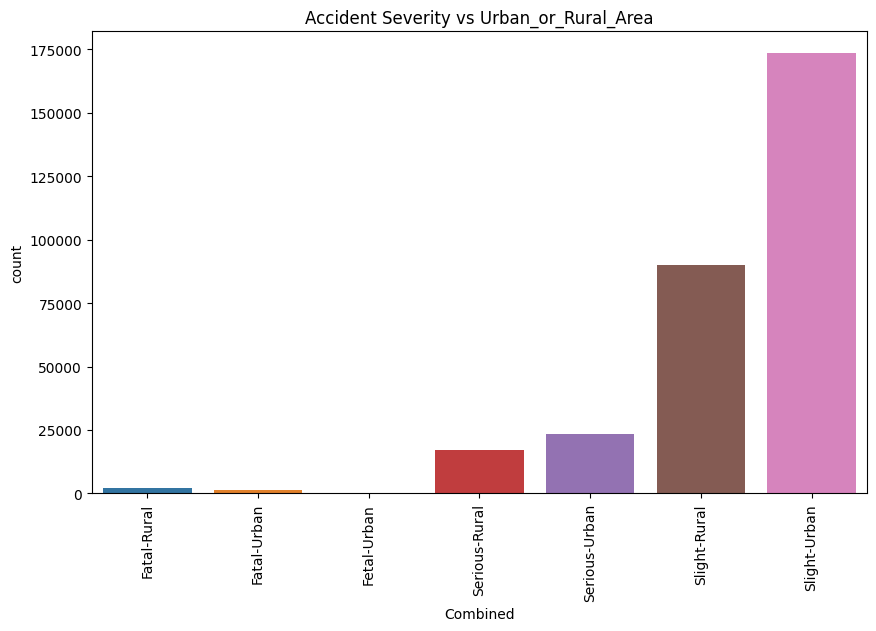

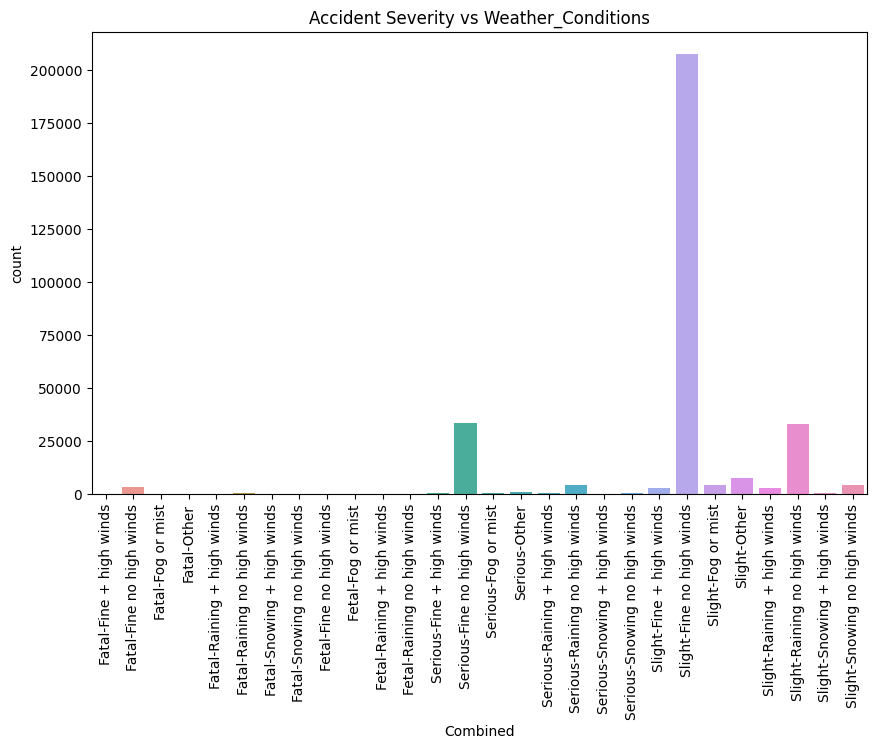

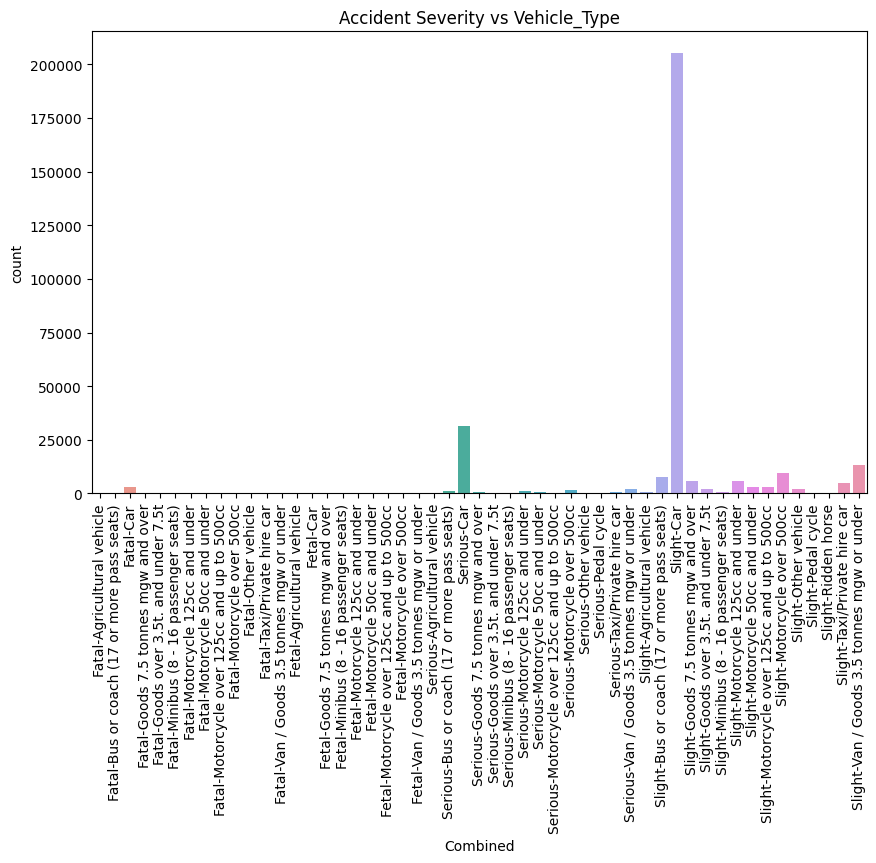

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 
                    'Local_Authority_(District)',  'Police_Force', 
                    'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area', 
                    'Weather_Conditions', 'Vehicle_Type']

for col in categorical_cols:
    # Create a DataFrame with one row per combination of 'Accident_Severity' and the current column
    df_melted = pd.melt(df, id_vars=['Accident_Severity'], value_vars=[col])

    # Create a new column that combines 'Accident_Severity' and the current column
    df_melted['Combined'] = df_melted['Accident_Severity'] + '-' + df_melted['value']

    # Create a count plot
    plt.figure(figsize=(10,6))
    sns.countplot(x='Combined', data=df_melted, order=sorted(df_melted['Combined'].unique()))
    plt.title('Accident Severity vs ' + col)
    plt.xticks(rotation=90)
    plt.show()

In [7]:
data.describe()

Latitude      Longitude  Number_of_Casualties  Number_of_Vehicles  \
count  307973.000000  307973.000000         307973.000000       307973.000000   
mean       52.487005      -1.368884              1.356882            1.829063   
std         1.339011       1.356092              0.815857            0.710477   
min        49.914488      -7.516225              1.000000            1.000000   
25%        51.485248      -2.247937              1.000000            1.000000   
50%        52.225943      -1.349258              1.000000            2.000000   
75%        53.415517      -0.206810              1.000000            2.000000   
max        60.598055       1.759398             48.000000           32.000000   

         Speed_limit  
count  307973.000000  
mean       38.866037  
std        14.032933  
min        10.000000  
25%        30.000000  
50%        30.000000  
75%        50.000000  
max        70.000000

## EDA

In [13]:
#Checking for missing values
df.isnull().sum()

Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Carriageway_Hazards            3
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [14]:
# print unique value count for each column
for column in df.columns:
    print(column, df[column].nunique())

Accident_Index 307973
Accident Date 730
Day_of_Week 7
Junction_Control 7
Junction_Detail 9
Accident_Severity 4
Latitude 264362
Light_Conditions 5
Local_Authority_(District) 422
Carriageway_Hazards 6
Longitude 269856
Number_of_Casualties 28
Number_of_Vehicles 17
Police_Force 51
Road_Surface_Conditions 5
Road_Type 5
Speed_limit 8
Time 1439
Urban_or_Rural_Area 2
Weather_Conditions 8
Vehicle_Type 15


### unique val

In [16]:
# print unique values for each column if less than 30 unique values
for column in df.columns:
    if df[column].nunique() < 30:
        print(column, df[column].unique())
        print()

Day_of_Week ['Thursday' 'Monday' 'Sunday' 'Tuesday' 'Friday' 'Wednesday' 'Saturday']

Junction_Control ['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']

Junction_Detail ['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'Roundabout' 'Mini-roundabout'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Slip road' 'Other junction']

Accident_Severity ['Serious' 'Slight' 'Fetal' 'Fatal']

Light_Conditions ['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']

Carriageway_Hazards ['None' 'Pedestrian in carriageway - not injured' 'Other object on road'
 'Any animal in carriageway (except ridden horse)' 'Previous accident'
 'Vehicle load on road' nan]

Number_of_Casualties [ 1 11  3  2  4  5  6 10  8  7  9 13 12 14 16 18 15 19 21 17 27 48 40 24
 26 22 42 43]

Num

In [22]:
for column in df.columns:
    if df[column].nunique() < 60:
        print(column)
        print(df[column].value_counts())
        print()


Day_of_Week
Day_of_Week
Friday       50529
Tuesday      46386
Wednesday    46381
Thursday     45649
Monday       43918
Saturday     41566
Sunday       33544
Name: count, dtype: int64

Junction_Control
Junction_Control
Give way or uncontrolled               150045
Data missing or out of range            98056
Auto traffic signal                     32256
Not at junction or within 20 metres     25378
Stop sign                                1685
Authorised person                         460
Auto traffic sigl                          93
Name: count, dtype: int64

Junction_Detail
Junction_Detail
Not at junction or within 20 metres    123094
T or staggered junction                 96718
Crossroads                              29948
Roundabout                              27264
Private drive or entrance               10875
Other junction                           8315
Slip road                                4265
More than 4 arms (not roundabout)        4148
Mini-roundabout                  

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].nunique() < 30:
        df[column].hist()
        plt.title(column)
        plt.show()
        

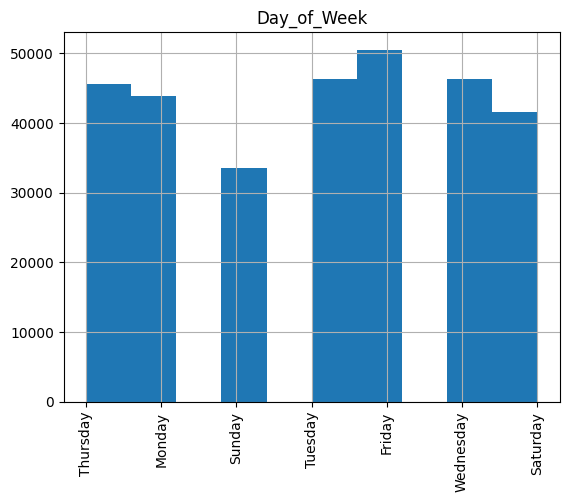

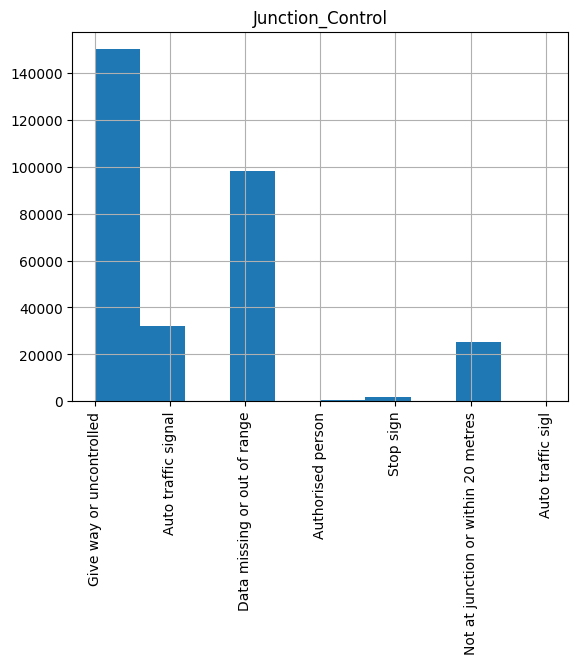

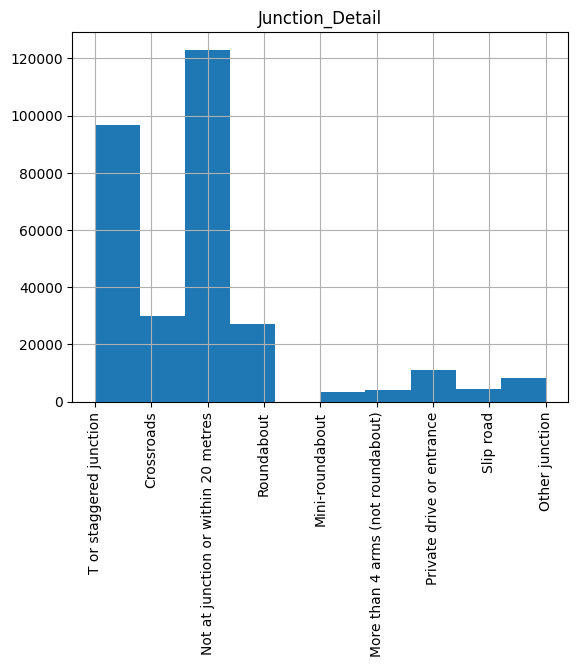

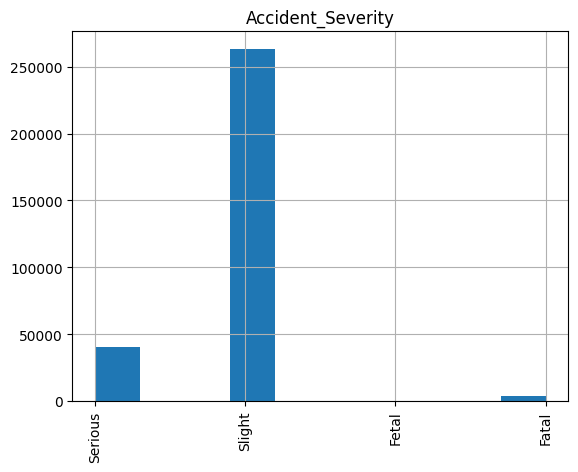

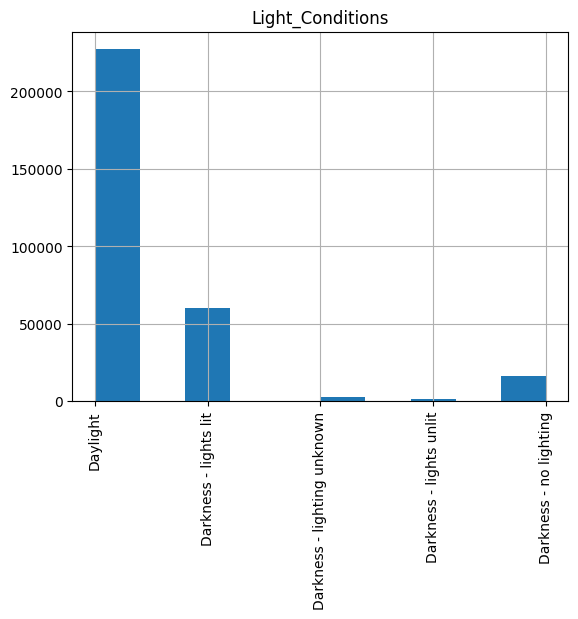

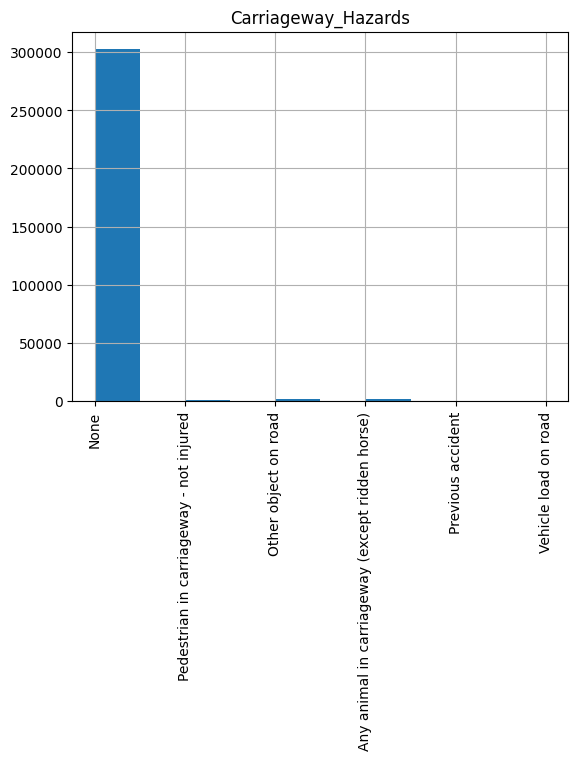

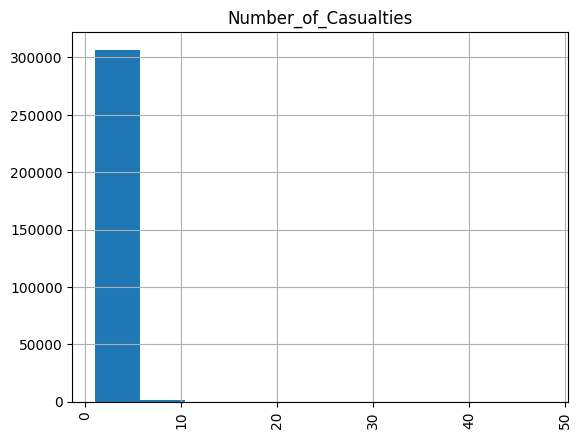

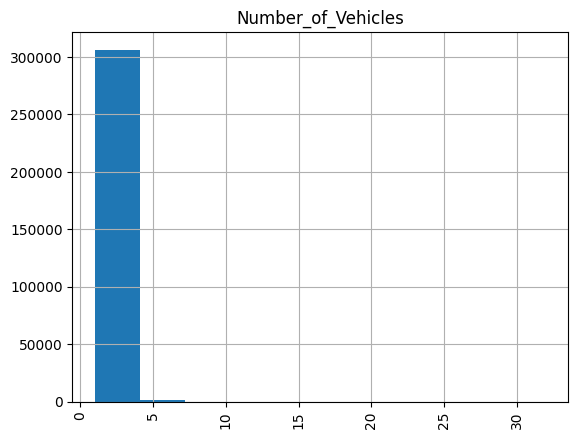

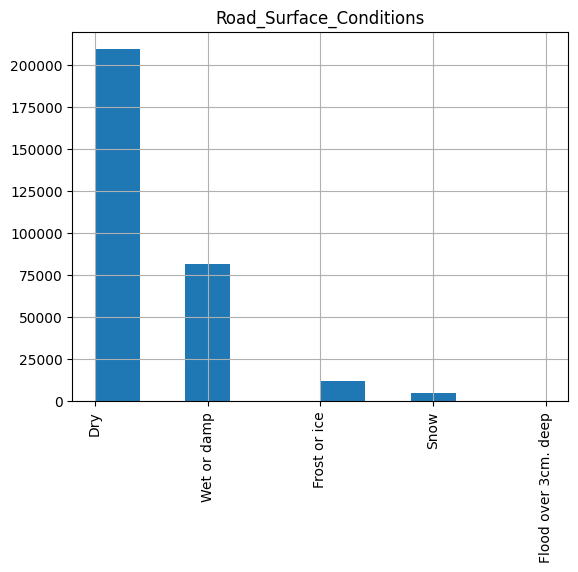

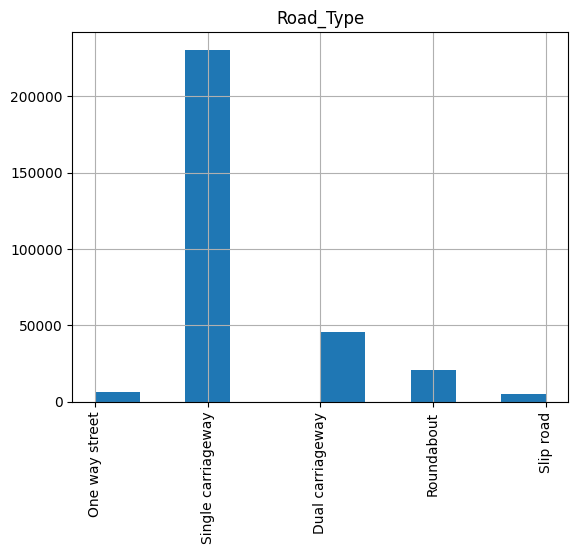

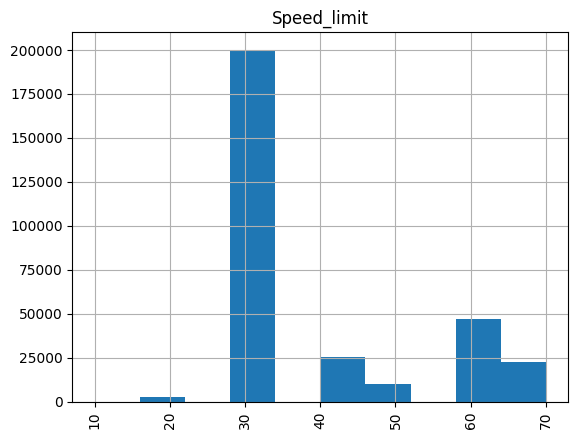

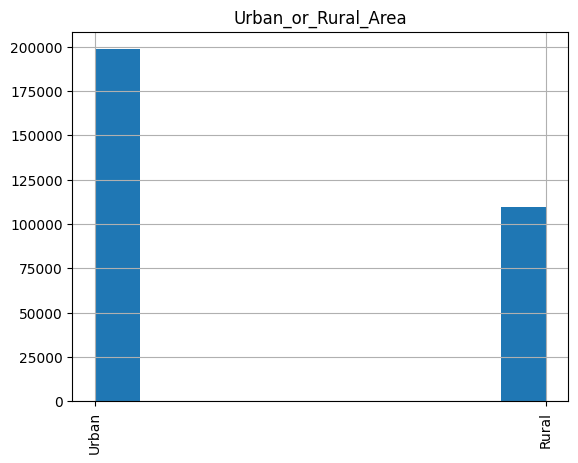

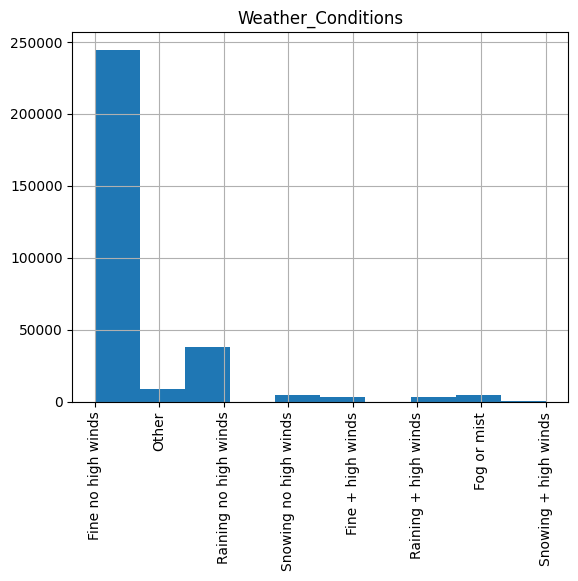

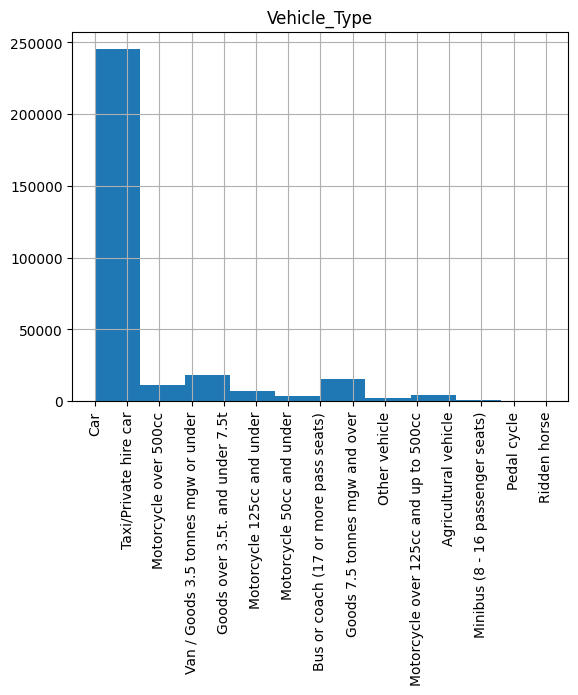

In [19]:
import matplotlib.pyplot as plt

for column in df.columns:
    if df[column].nunique() < 30:
        df[column].hist()
        plt.title(column)
        plt.xticks(rotation='vertical')
        plt.show()

### outliers

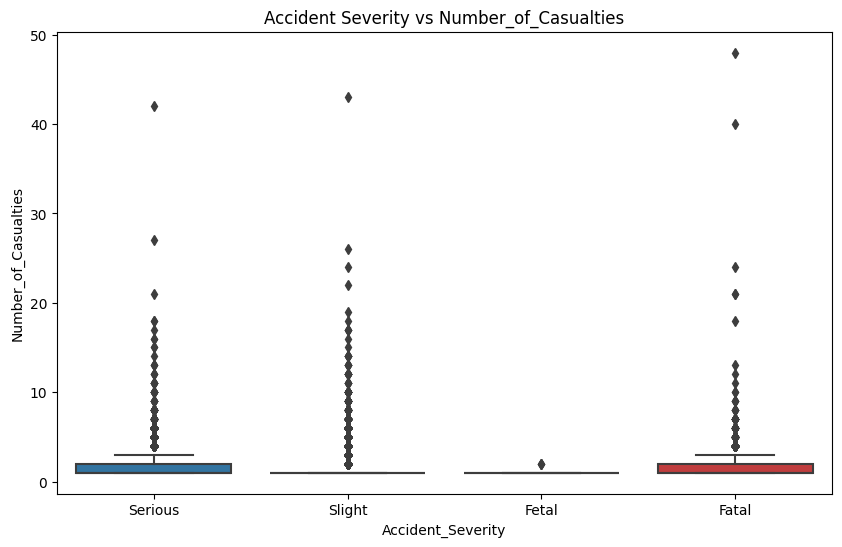

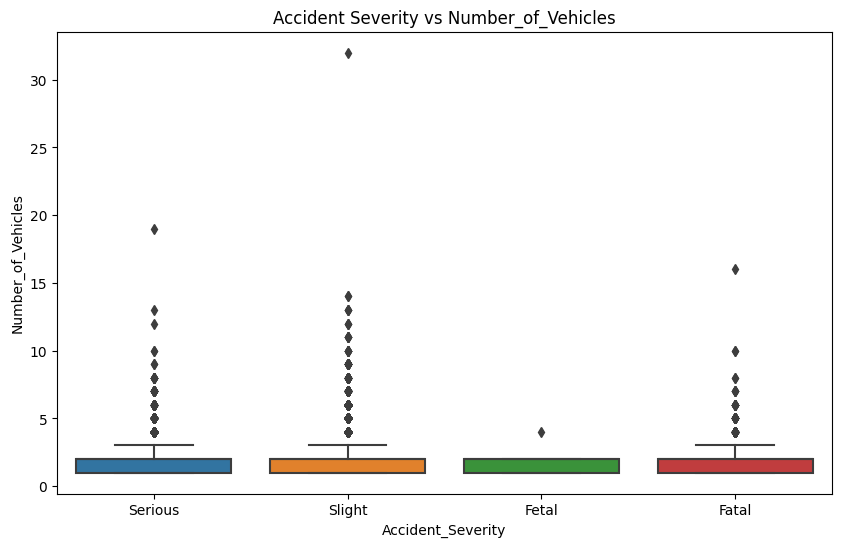

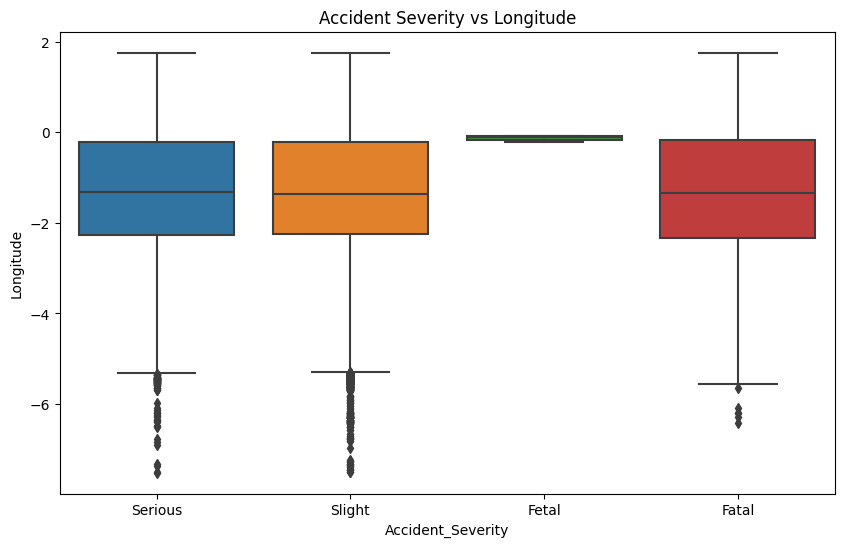

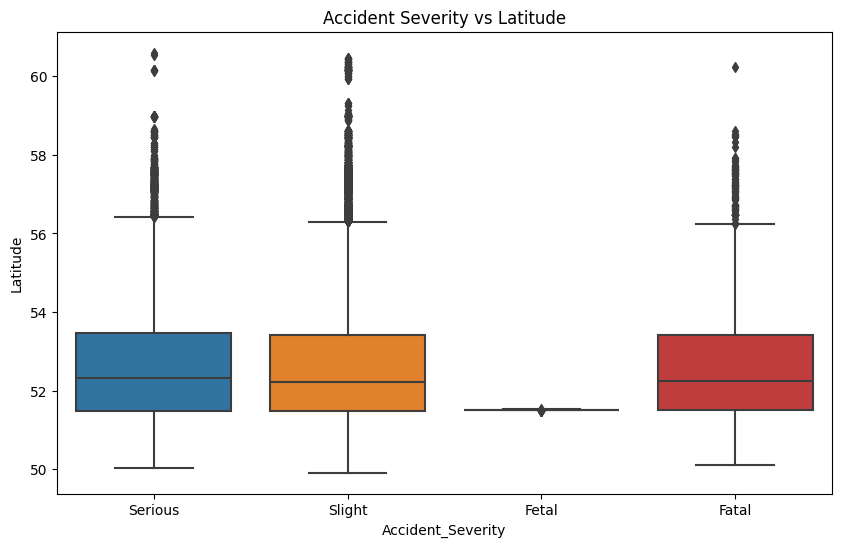

In [13]:
#outliers in numerical columns and location data(Longitude and Latitude)
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_cols = ['Number_of_Casualties', 'Number_of_Vehicles', 'Longitude', 'Latitude']

for col in numerical_cols:
    # Create a box plot
    plt.figure(figsize=(10,6))
    sns.boxplot(x='Accident_Severity', y=col, data=df)
    plt.title('Accident Severity vs ' + col)
    plt.show()  


In [29]:
# print outliers in numerical columns using IQR. column wise if numerical
for column in df.columns:
    if df[column].dtype in ['int64', 'float64', 'int32', 'float32']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound  = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #print outlier values
        print(column, set(df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]))

Latitude {56.322383, 56.723636, 57.986195, 56.434824, 56.426313, 57.675321, 57.940269, 58.989752, 57.080403, 57.530734, 56.555371, 56.559605, 56.749985, 56.470852, 56.669827, 56.82234, 56.798924, 57.586159, 57.074091, 57.564277, 57.446211, 57.075341, 57.155102, 57.579454, 57.144654, 58.068098, 60.535623, 60.185749, 56.941991, 56.568388, 56.55632, 56.472521, 56.407904, 56.803712, 56.758997, 56.369092, 58.030243, 57.576942, 57.540695, 56.580237, 56.580957, 57.557269, 56.442001, 57.304704, 56.468569, 57.596854, 57.641612, 57.679256, 56.485143, 56.6246, 56.469747, 57.185431, 56.472136, 57.136668, 57.287244, 57.444891, 56.59624, 56.399509, 57.091734, 57.191158, 57.157071, 57.054047, 56.483537, 57.386721, 56.728135, 56.375874, 56.319768, 56.436934, 57.242811, 57.515507, 56.462019, 56.66163, 58.959892, 57.11948, 56.475079, 56.323783, 58.256276, 56.984825, 56.951054, 57.648122, 56.701685, 56.886302, 57.855097, 57.579701, 57.485951, 57.47798, 57.57191, 57.284266, 57.652152, 58.524542, 58.594199

In [31]:
from scipy.stats import zscore

# print outliers in numerical columns using Z-score. column wise if numerical
for column in df.columns:
    if df[column].dtype in ['int64', 'float64', 'int32', 'float32']:
        df[column+'_zscore'] = zscore(df[column])
        # print outlier values
        print(column,set( df[(df[column+'_zscore'] < -3) | (df[column+'_zscore'] > 3)][column]))

Latitude {56.723636, 57.986195, 57.675321, 57.940269, 58.989752, 57.080403, 57.530734, 56.555371, 56.559605, 56.749985, 56.669827, 56.82234, 56.798924, 57.586159, 57.074091, 57.564277, 57.446211, 57.075341, 57.155102, 57.579454, 57.144654, 58.068098, 60.535623, 60.185749, 56.941991, 56.568388, 56.55632, 56.803712, 56.758997, 58.030243, 57.576942, 57.540695, 56.580237, 56.580957, 57.557269, 57.304704, 57.596854, 57.641612, 57.679256, 56.6246, 57.185431, 57.136668, 57.287244, 57.444891, 56.59624, 57.091734, 57.191158, 57.157071, 57.054047, 57.386721, 56.728135, 57.242811, 57.515507, 56.66163, 58.959892, 57.11948, 58.256276, 56.984825, 56.951054, 57.648122, 56.701685, 56.886302, 57.855097, 57.579701, 57.485951, 57.47798, 57.57191, 57.284266, 57.652152, 58.524542, 58.594199, 58.592489, 58.980907, 58.235365, 58.524631, 57.737147, 57.471522, 57.239984, 57.485707, 59.00198, 59.002025, 57.538256, 57.194549, 56.565773, 60.157151, 57.166365, 56.820999, 57.16154, 57.202841, 57.404526, 57.126833, 

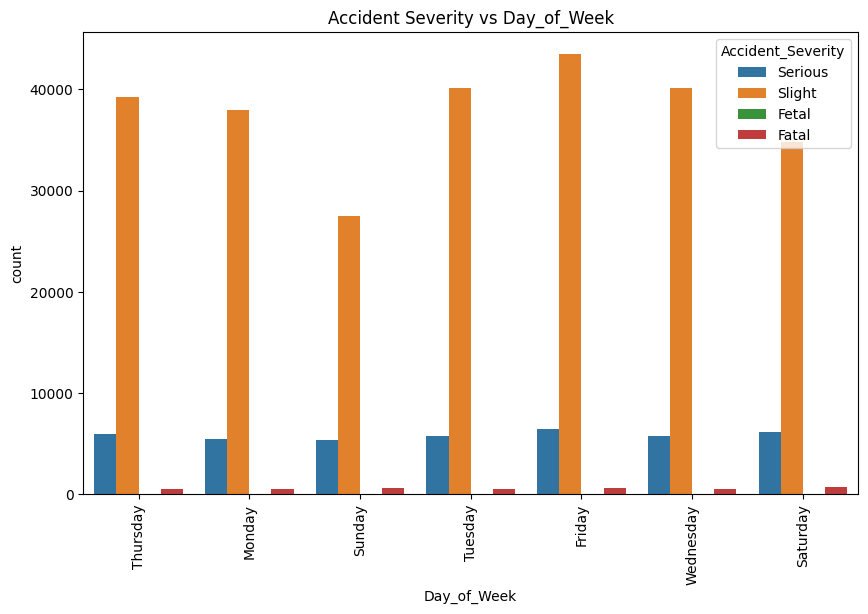

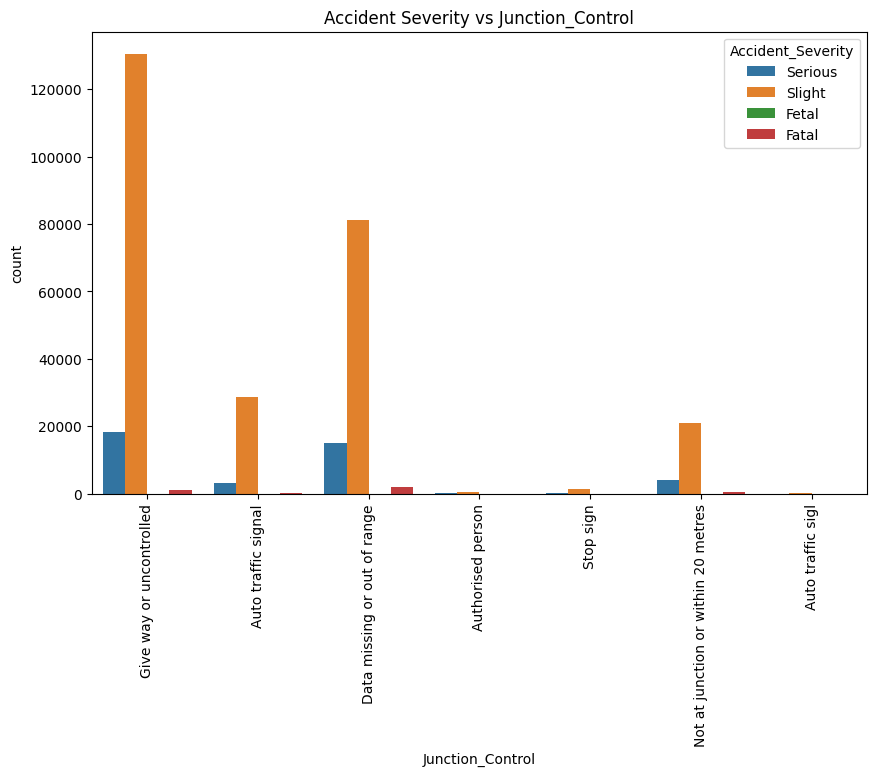

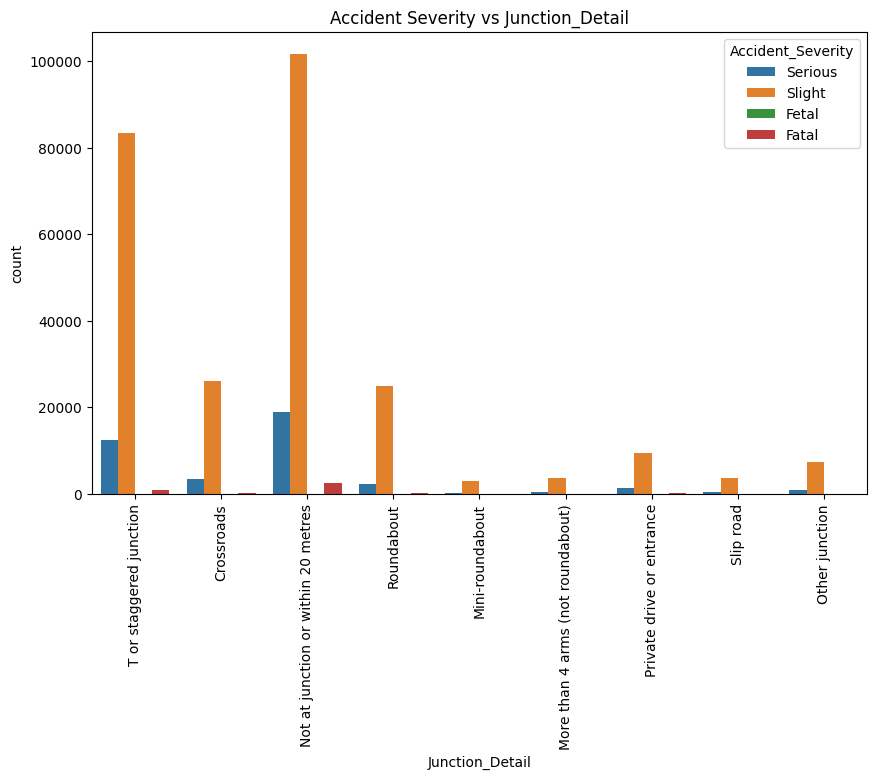

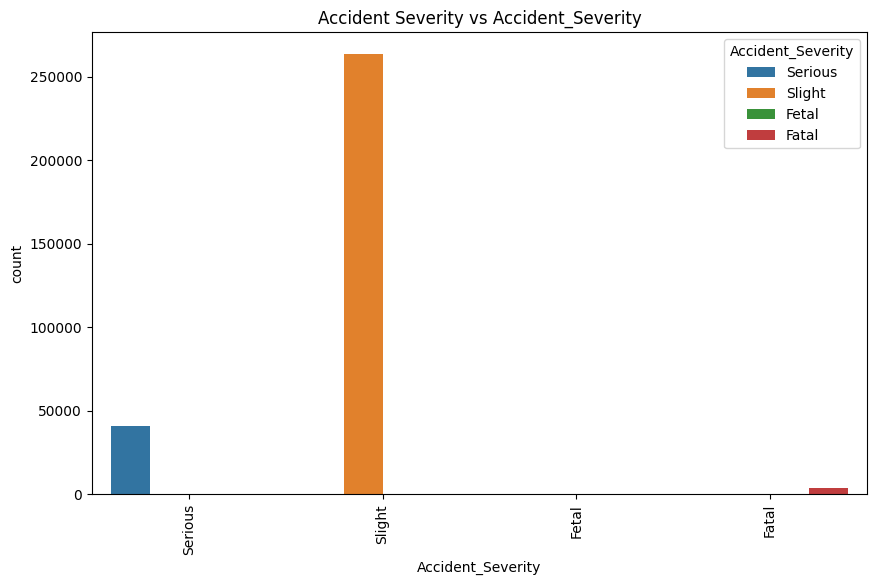

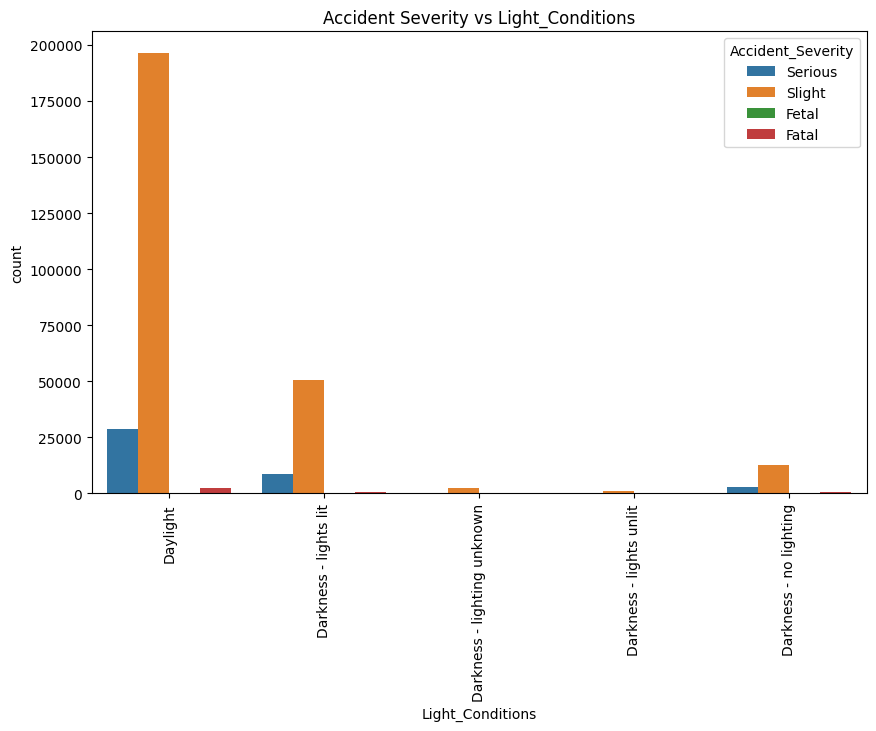

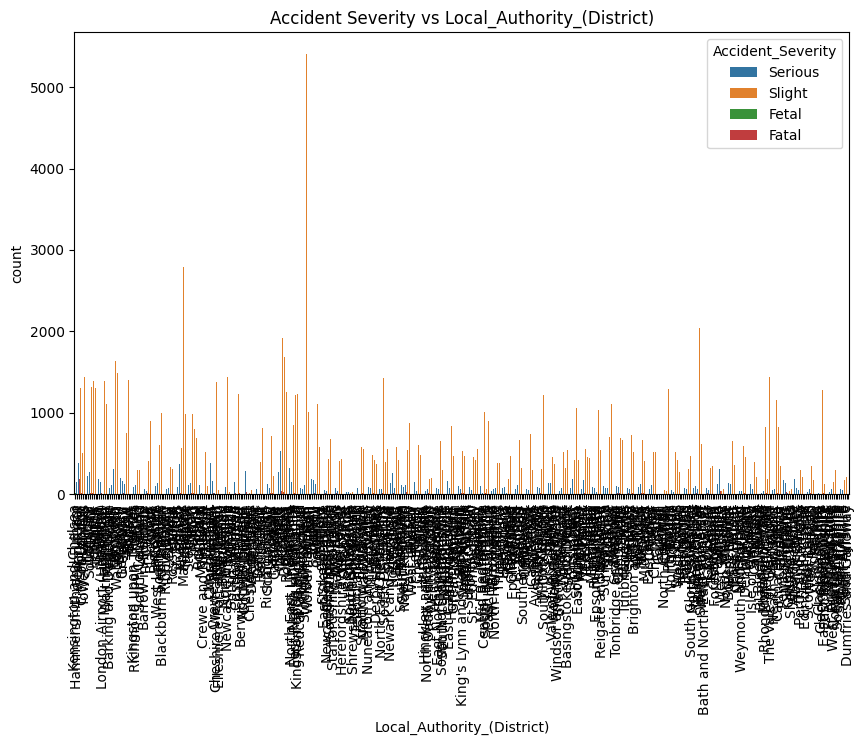

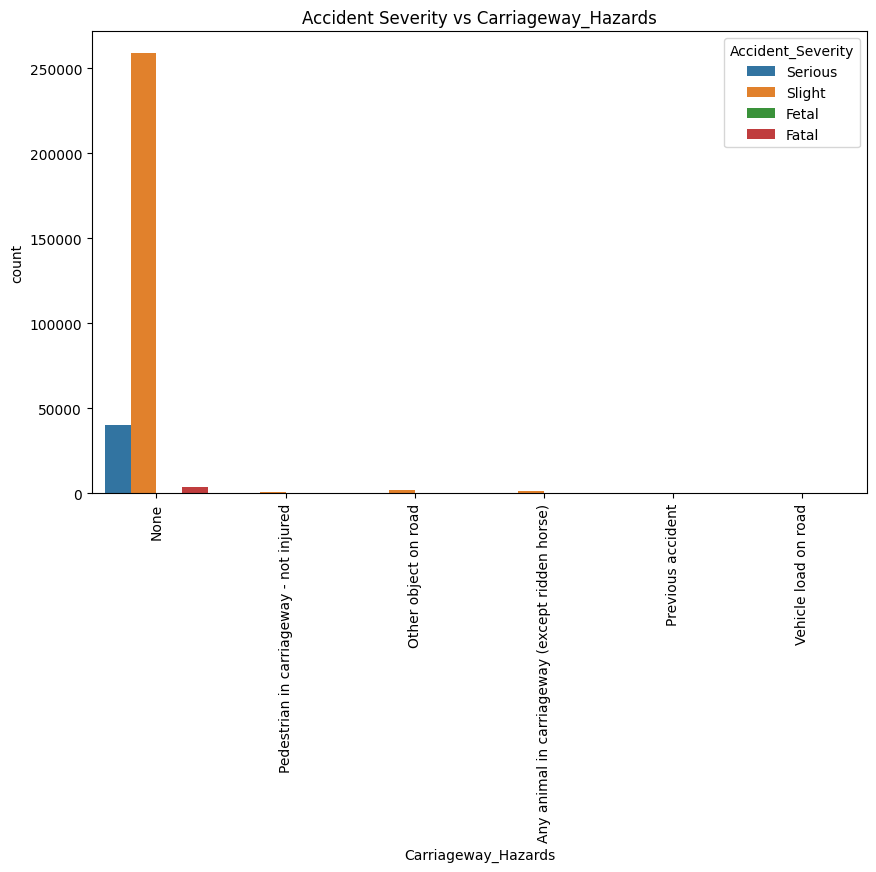

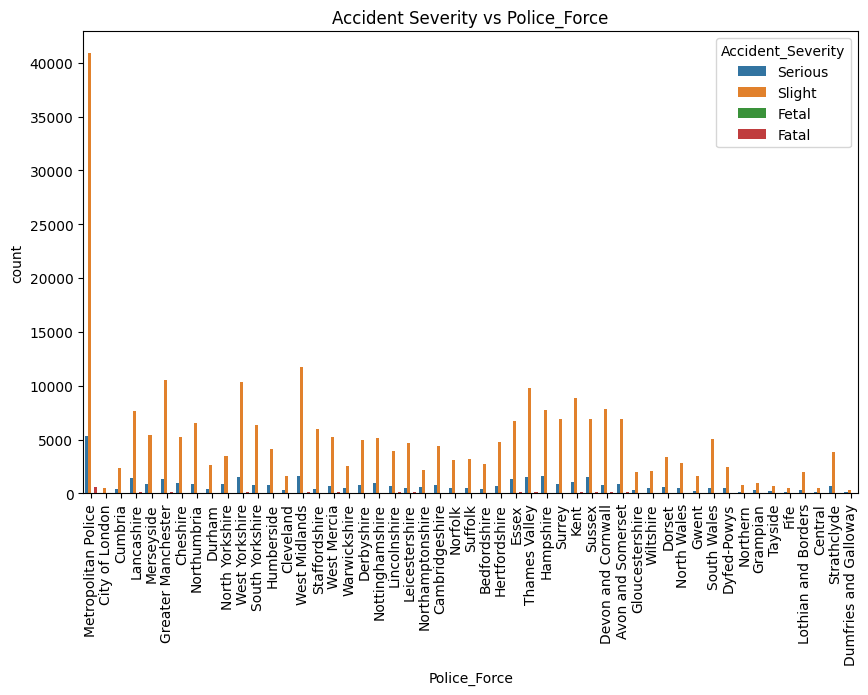

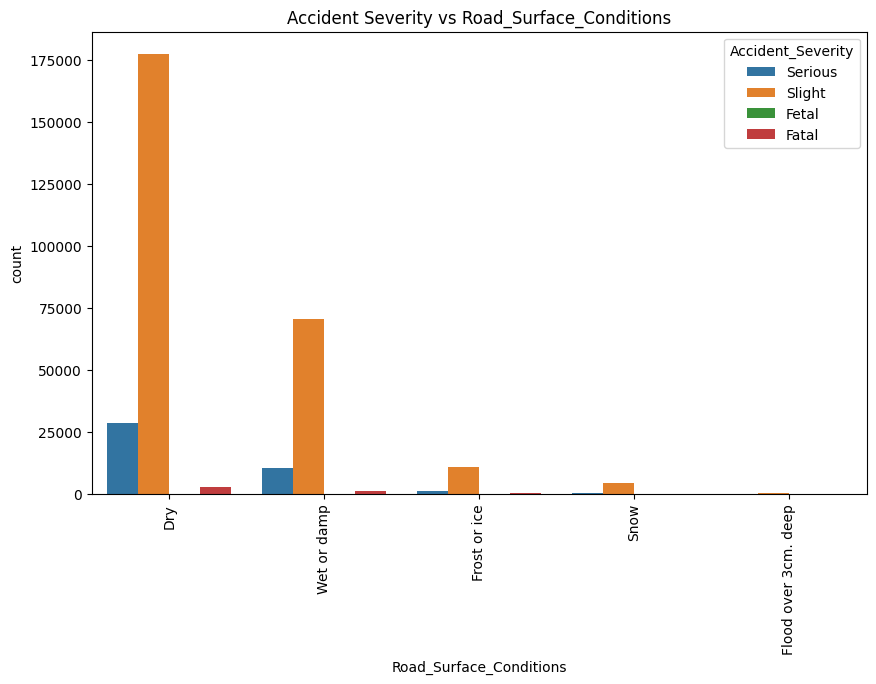

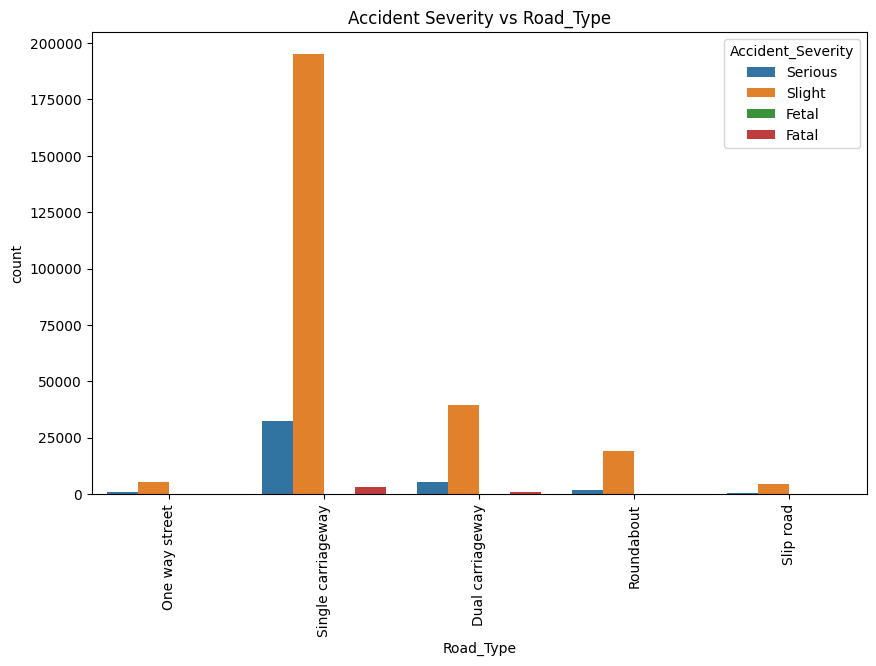

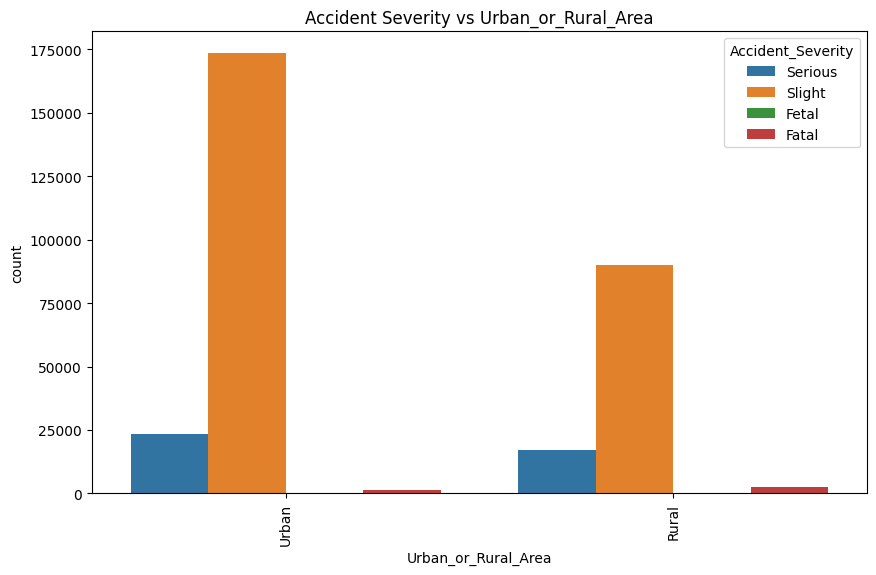

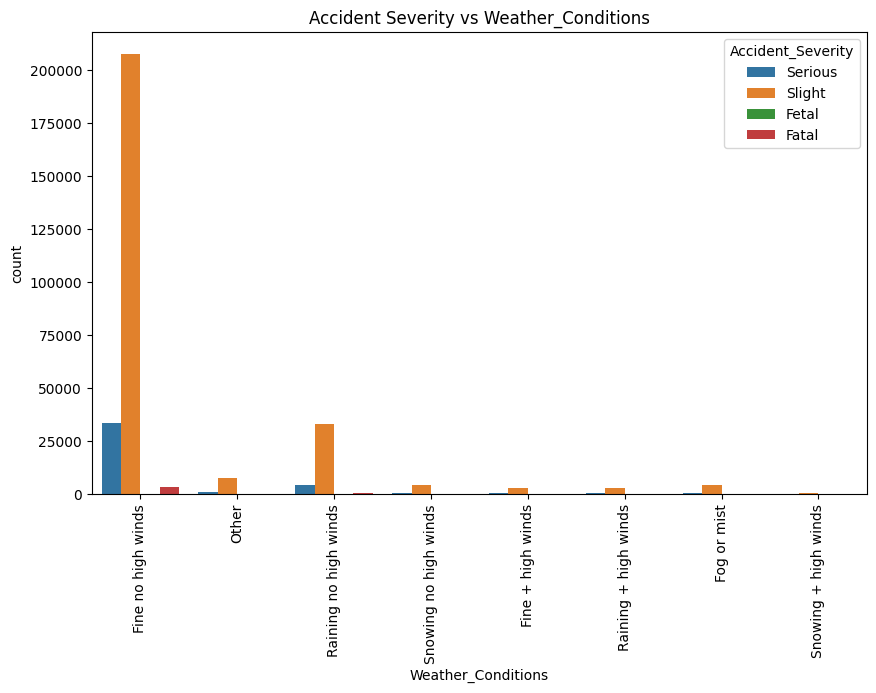

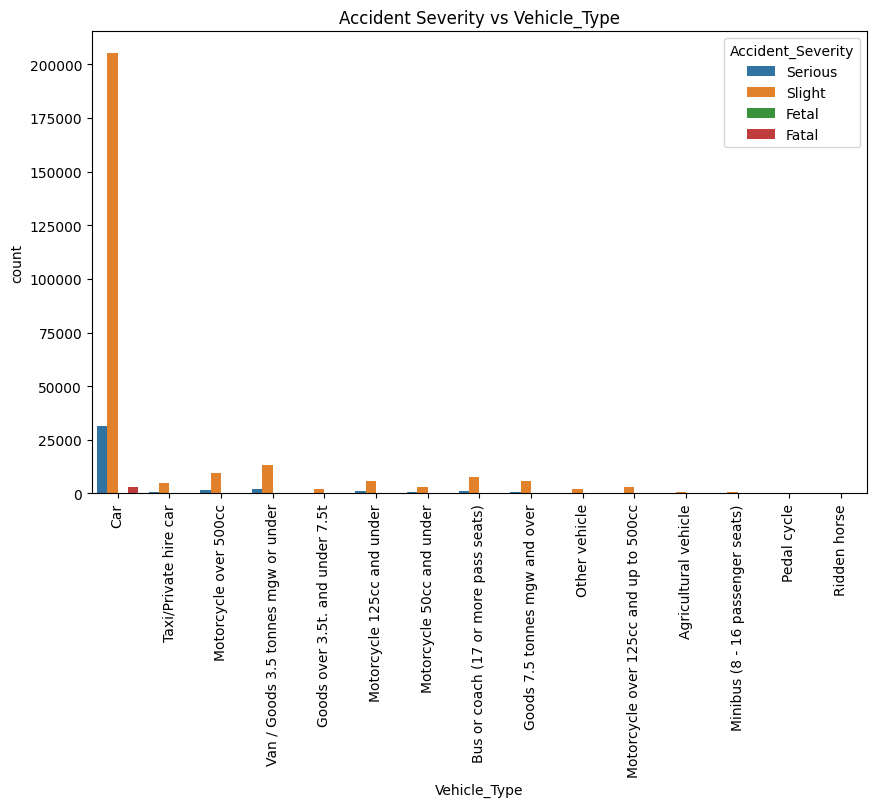

In [21]:
# List of categorical columns
categorical_cols = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Light_Conditions', 
                    'Local_Authority_(District)', 'Carriageway_Hazards', 'Police_Force', 'Road_Surface_Conditions', 
                    'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']

for col in categorical_cols:
    # Create a count plot
    plt.figure(figsize=(10,6))
    sns.countplot(x=col, hue='Accident_Severity', data=df)
    plt.title('Accident Severity vs ' + col)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.show()

In [12]:
# Get the list of categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print outliers in categorical columns
for column in categorical_columns:
    value_counts = df[column].value_counts()
    #print(value_counts.mean() )
    Q1 = value_counts.quantile(0.25)
    Q3 = value_counts.quantile(0.75)
    IQR = Q3 - Q1

    outliers = value_counts[(value_counts < (Q1 - 1.5 * IQR)) | (value_counts > (Q3 + 1.5 * IQR))].index  
    print(f"Outliers in {column}: {outliers}\n\n")


Outliers in Accident_Index: Index([], dtype='object', name='Accident_Index')


Outliers in Accident Date: Index(['13-11-2021', '11-02-2021', '06-10-2021', '04-12-2021', '12-11-2021',
       '01-10-2022', '03-11-2021', '25-12-2021', '26-12-2022', '31-12-2022',
       '28-12-2022', '27-12-2022', '30-12-2022', '25-12-2022', '10-01-2022'],
      dtype='object', name='Accident Date')


Outliers in Day_of_Week: Index(['Sunday'], dtype='object', name='Day_of_Week')


Outliers in Junction_Control: Index([], dtype='object', name='Junction_Control')


Outliers in Junction_Detail: Index(['Not at junction or within 20 metres', 'T or staggered junction'], dtype='object', name='Junction_Detail')


Outliers in Accident_Severity: Index(['Slight'], dtype='object', name='Accident_Severity')


Outliers in Light_Conditions: Index(['Daylight'], dtype='object', name='Light_Conditions')


Outliers in Local_Authority_(District): Index(['Birmingham', 'Leeds', 'Manchester', 'Bradford', 'Westminster',
       'Sh

In [29]:
for column in df.columns:
    if df[column].nunique() < 10:
        df = pd.get_dummies(df, columns=[column])



In [35]:
for column in df.columns:
    if df[column].nunique() < 10:
        df = pd.get_dummies(df, columns=[column])


## corr

In [37]:
# new dataframe with all 'bool' columns converted to int
# Create a new dataframe with all 'bool' columns converted to int
new_df = df.copy()
bool_columns = new_df.select_dtypes(include=['bool']).columns
new_df[bool_columns] = new_df[bool_columns].astype(int)
new_df



Accident_Index Accident Date   Latitude Local_Authority_(District)  \
0           BS0000001    01-01-2021  51.512273     Kensington and Chelsea   
1           BS0000002    05-01-2021  51.514399     Kensington and Chelsea   
2           BS0000003    04-01-2021  51.486668     Kensington and Chelsea   
3           BS0000004    05-01-2021  51.507804     Kensington and Chelsea   
4           BS0000005    06-01-2021  51.482076     Kensington and Chelsea   
...               ...           ...        ...                        ...   
307968      BS0307969    18-02-2022  57.374005                   Highland   
307969      BS0307970    21-02-2022  57.232273                   Highland   
307970      BS0307971    23-02-2022  57.585044                   Highland   
307971      BS0307972    23-02-2022  57.214898                   Highland   
307972      BS0307973    28-02-2022  57.575210                   Highland   

        Longitude  Number_of_Casualties  Number_of_Vehicles  \
0       -0.201349                     1                   2   
1       -0.199248                    11                   2   
2       -0.179599                     1                   2   
3       -0.203110                     1                   2   
4       -0.173445                     1                   2   
...           ...                   ...                 ...   
307968  -3.467828                     2                   1   
307969  -3.809281                     1                   1   
307970  -3.862727                     1                   3   
307971  -3.823997                     1                   2   
307972  -3.895673                     1                   1   

               Police_Force   Time           Vehicle_Type  ...  \
0       Metropolitan Police  15:11                    Car  ...   
1       Metropolitan Police  10:59  Taxi/Private hire car  ...   
2       Metropolitan Police  14:19  Taxi/Private hire car  ...   
3       Metropolitan Police  08:10  Motorcycle over 500cc  ...   
4       Metropolitan Police  17:25                    Car  ...   
...                     ...    ...                    ...  ...   
307968             Northern  07:00                    Car  ...   
307969             Northern  03:00                    Car  ...   
307970             Northern  09:38                    Car  ...   
307971             Northern  18:25  Motorcycle over 500cc  ...   
307972             Northern  15:45                    Car  ...   

        Urban_or_Rural_Area_Rural  Urban_or_Rural_Area_Urban  \
0                               0                          1   
1                               0                          1   
2                               0                          1   
3                               0                          1   
4                               0                          1   
...                           ...                        ...   
307968                          1                          0   
307969                          1                          0   
307970                          1                          0   
307971                          1                          0   
307972                          1                          0   

        Weather_Conditions_Fine + high winds  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
307968                                     0   
307969                                     0   
307970                                     0   
307971                                     0   
307972                                     0   

        Weather_Conditions_Fine no high winds  Weather_Conditions_Fog or mist  \
0                                           1                               0   
1                       

In [40]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 76 columns):
 #   Column                                                               Non-Null Count   Dtype  
---  ------                                                               --------------   -----  
 0   Accident_Index                                                       307973 non-null  object 
 1   Accident Date                                                        307973 non-null  object 
 2   Latitude                                                             307973 non-null  float64
 3   Local_Authority_(District)                                           307973 non-null  object 
 4   Longitude                                                            307973 non-null  float64
 5   Number_of_Casualties                                                 307973 non-null  int64  
 6   Number_of_Vehicles                                                   307973 non-null  int64 

In [ ]:
corr_matrix = new_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

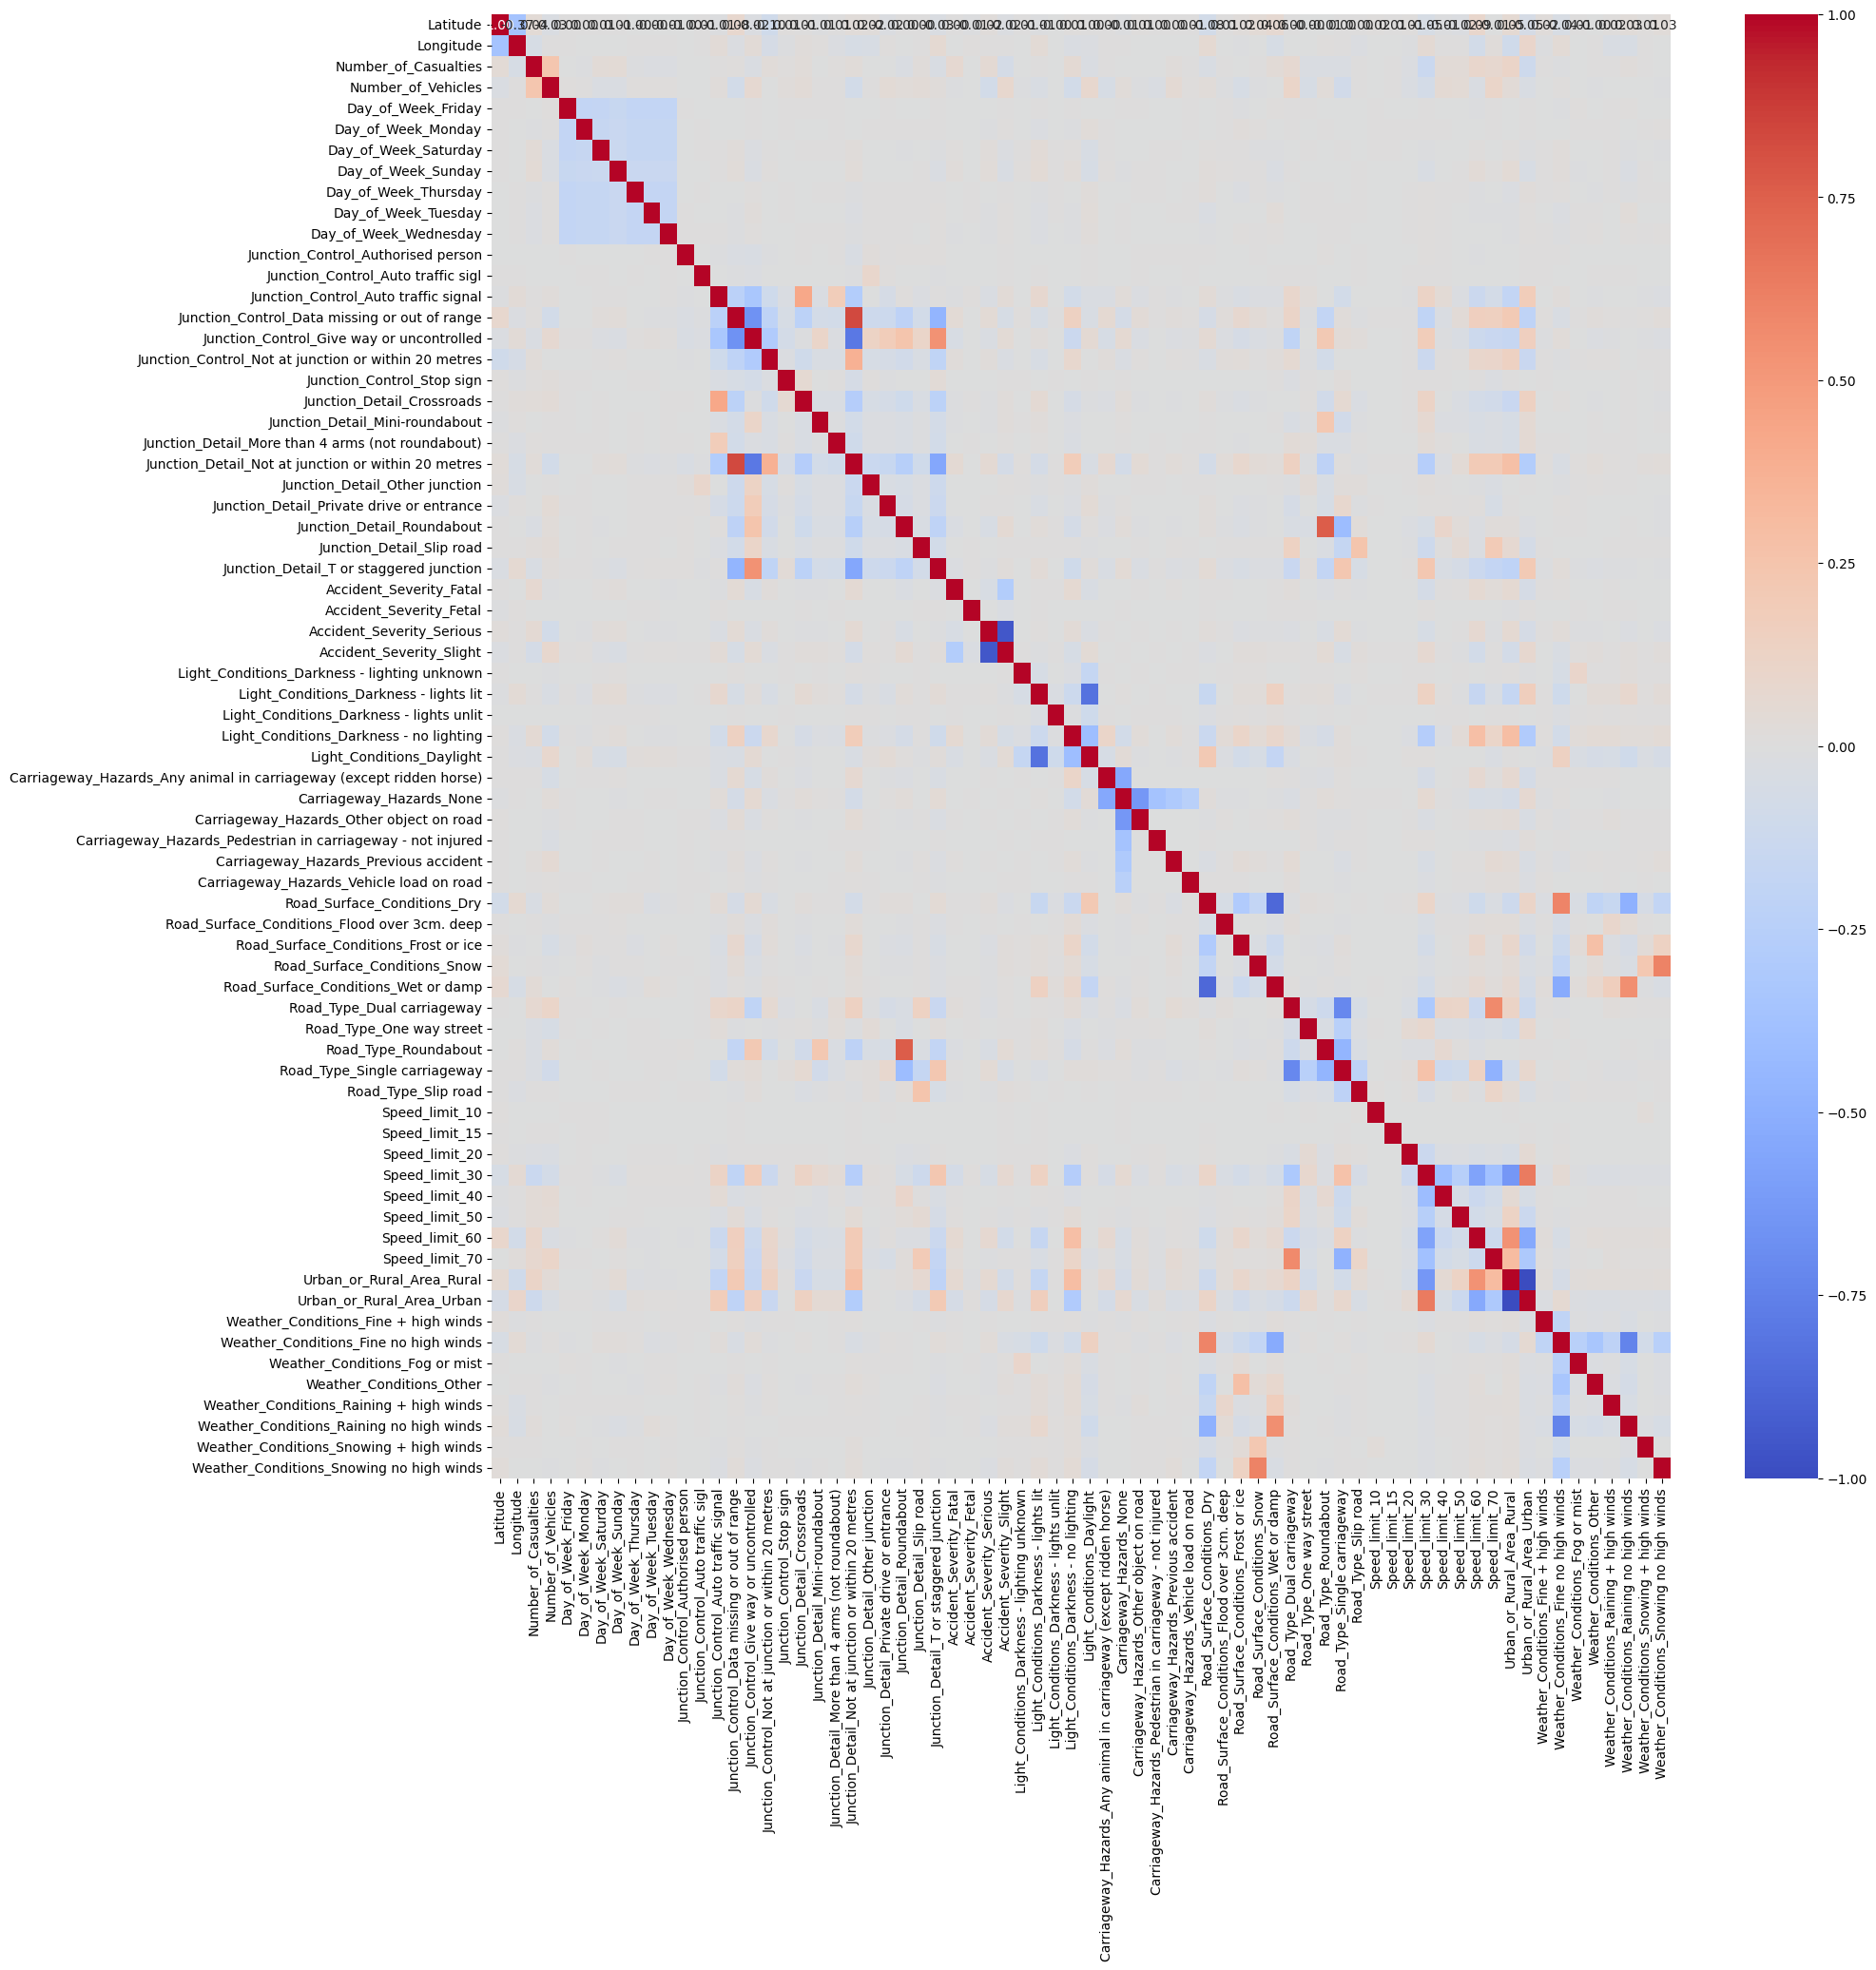

In [41]:
# Select only numerical columns
numerical_df = new_df.select_dtypes(include=['float64', 'int64','int32'])

# Calculate correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


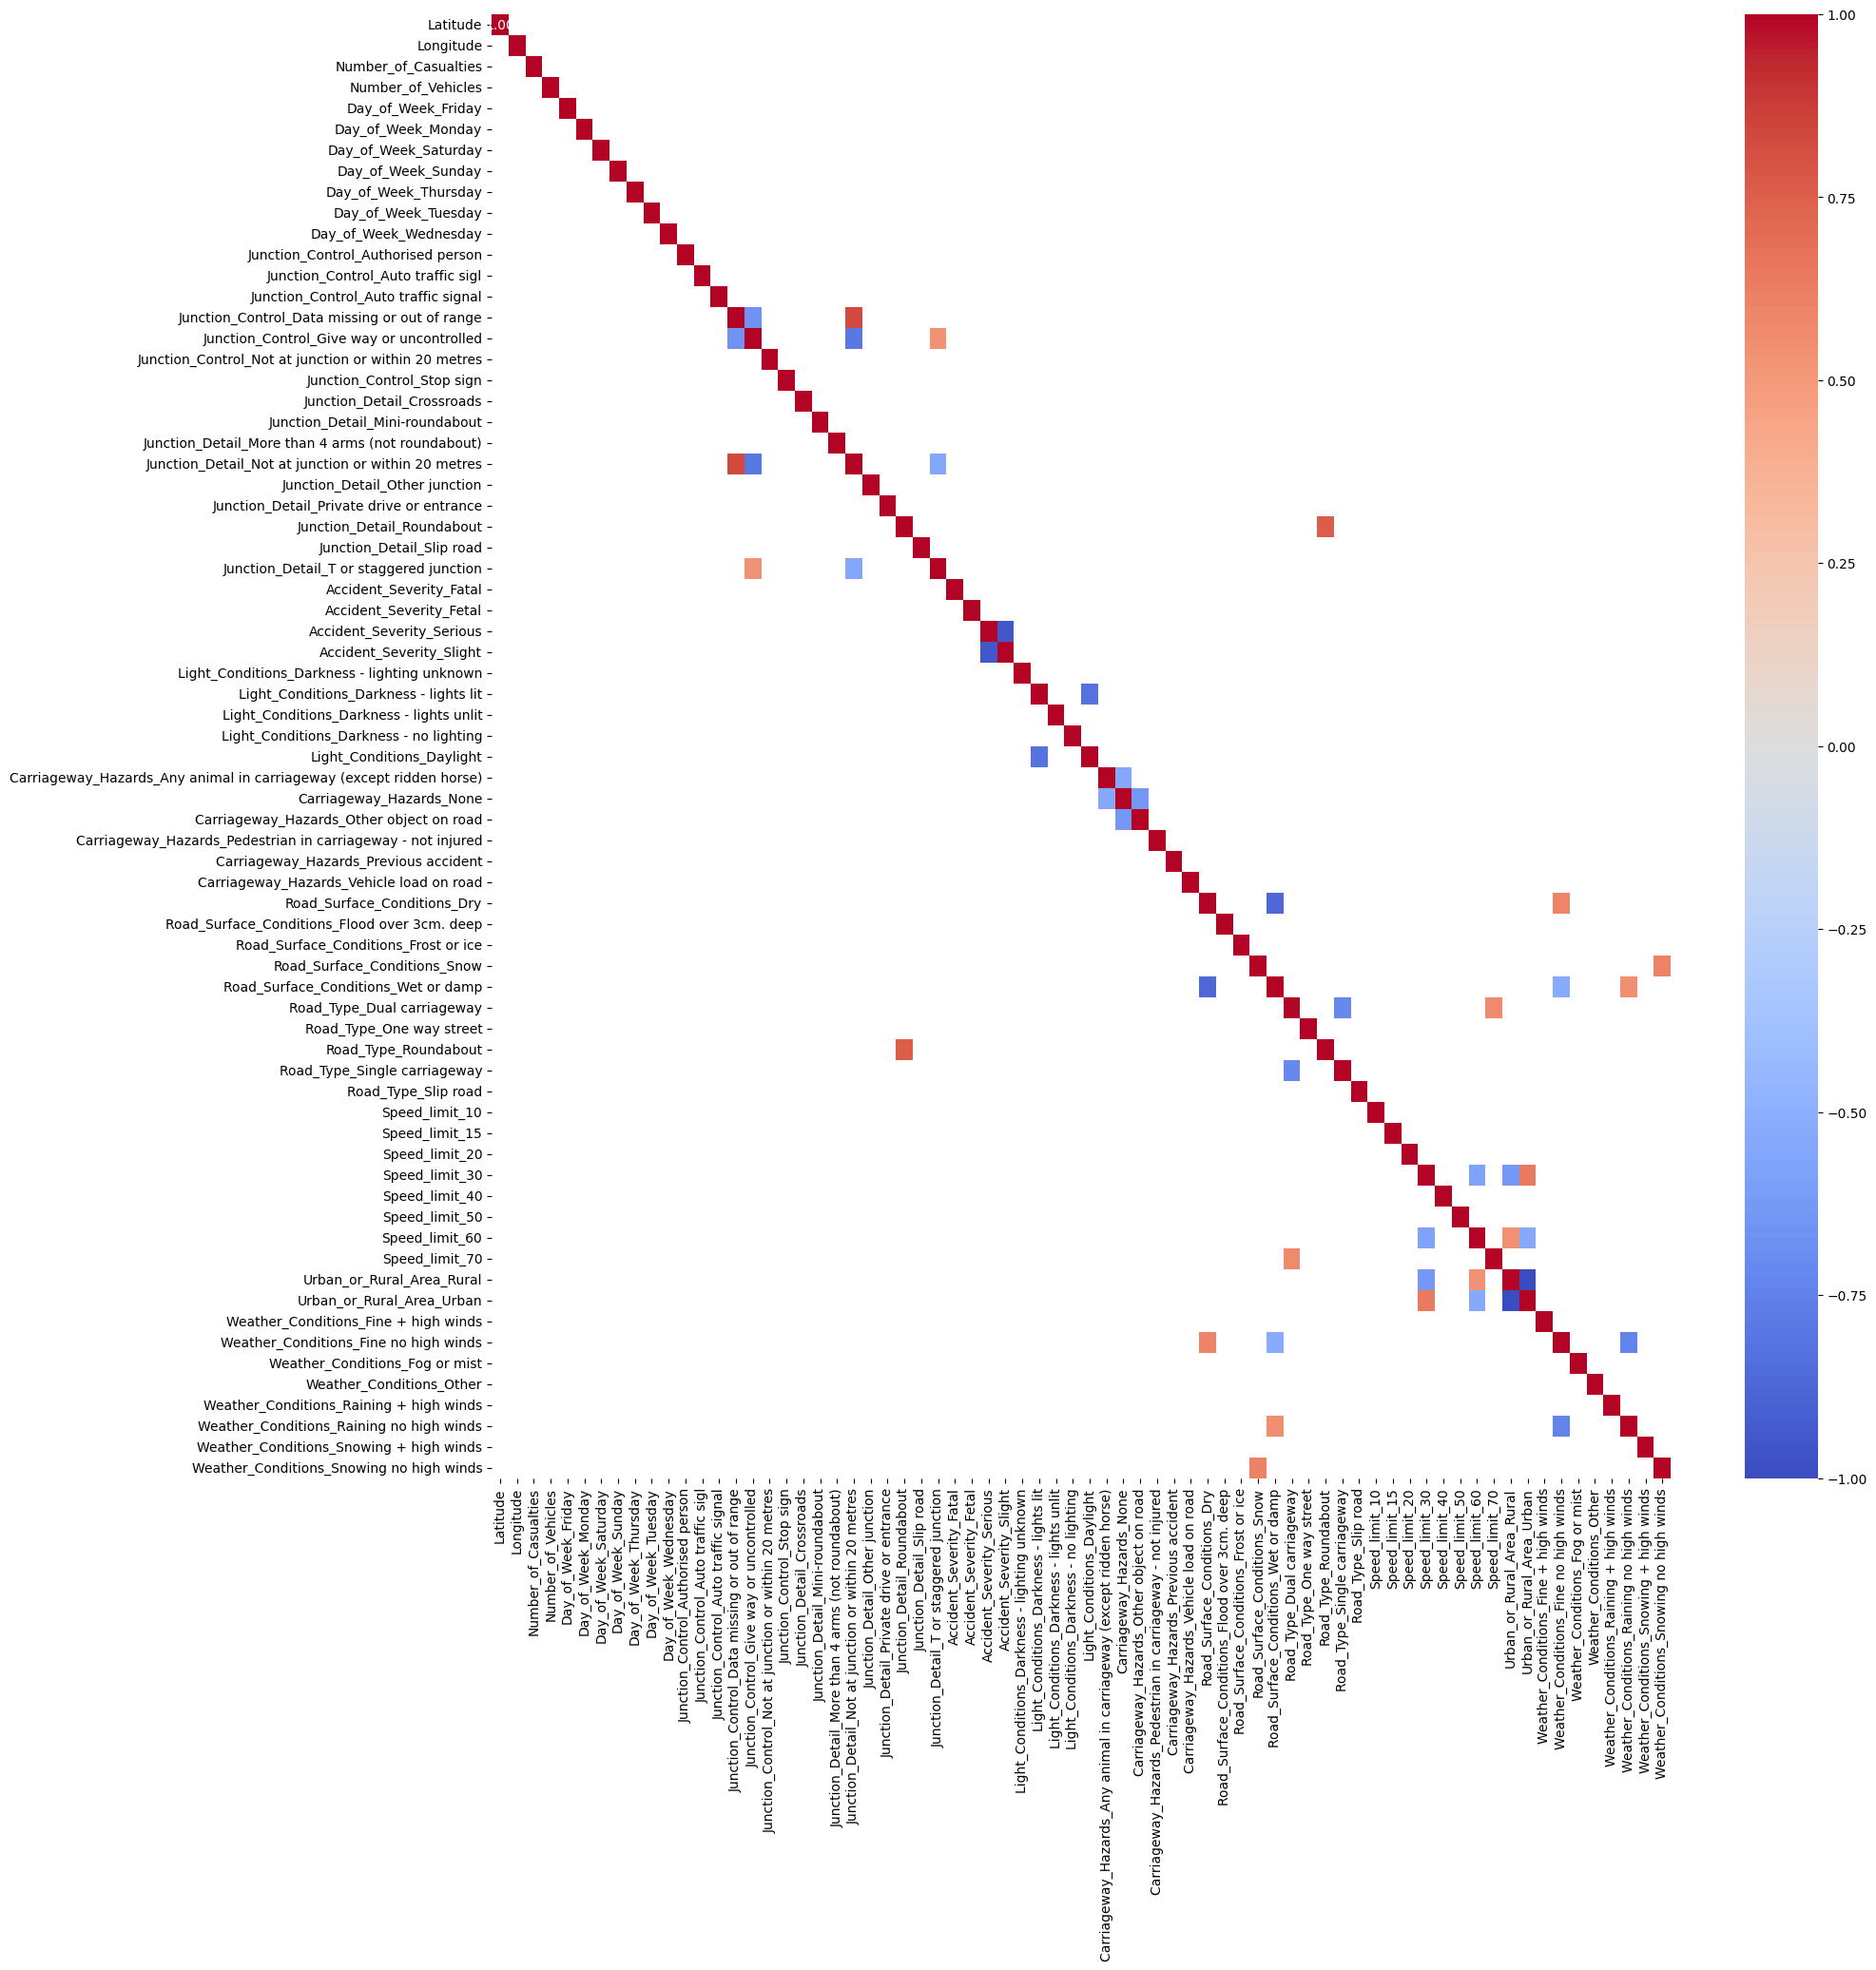

In [42]:
#plot the correlation matrix if the value is greater than 0.5 or less than -0.5
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)], annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


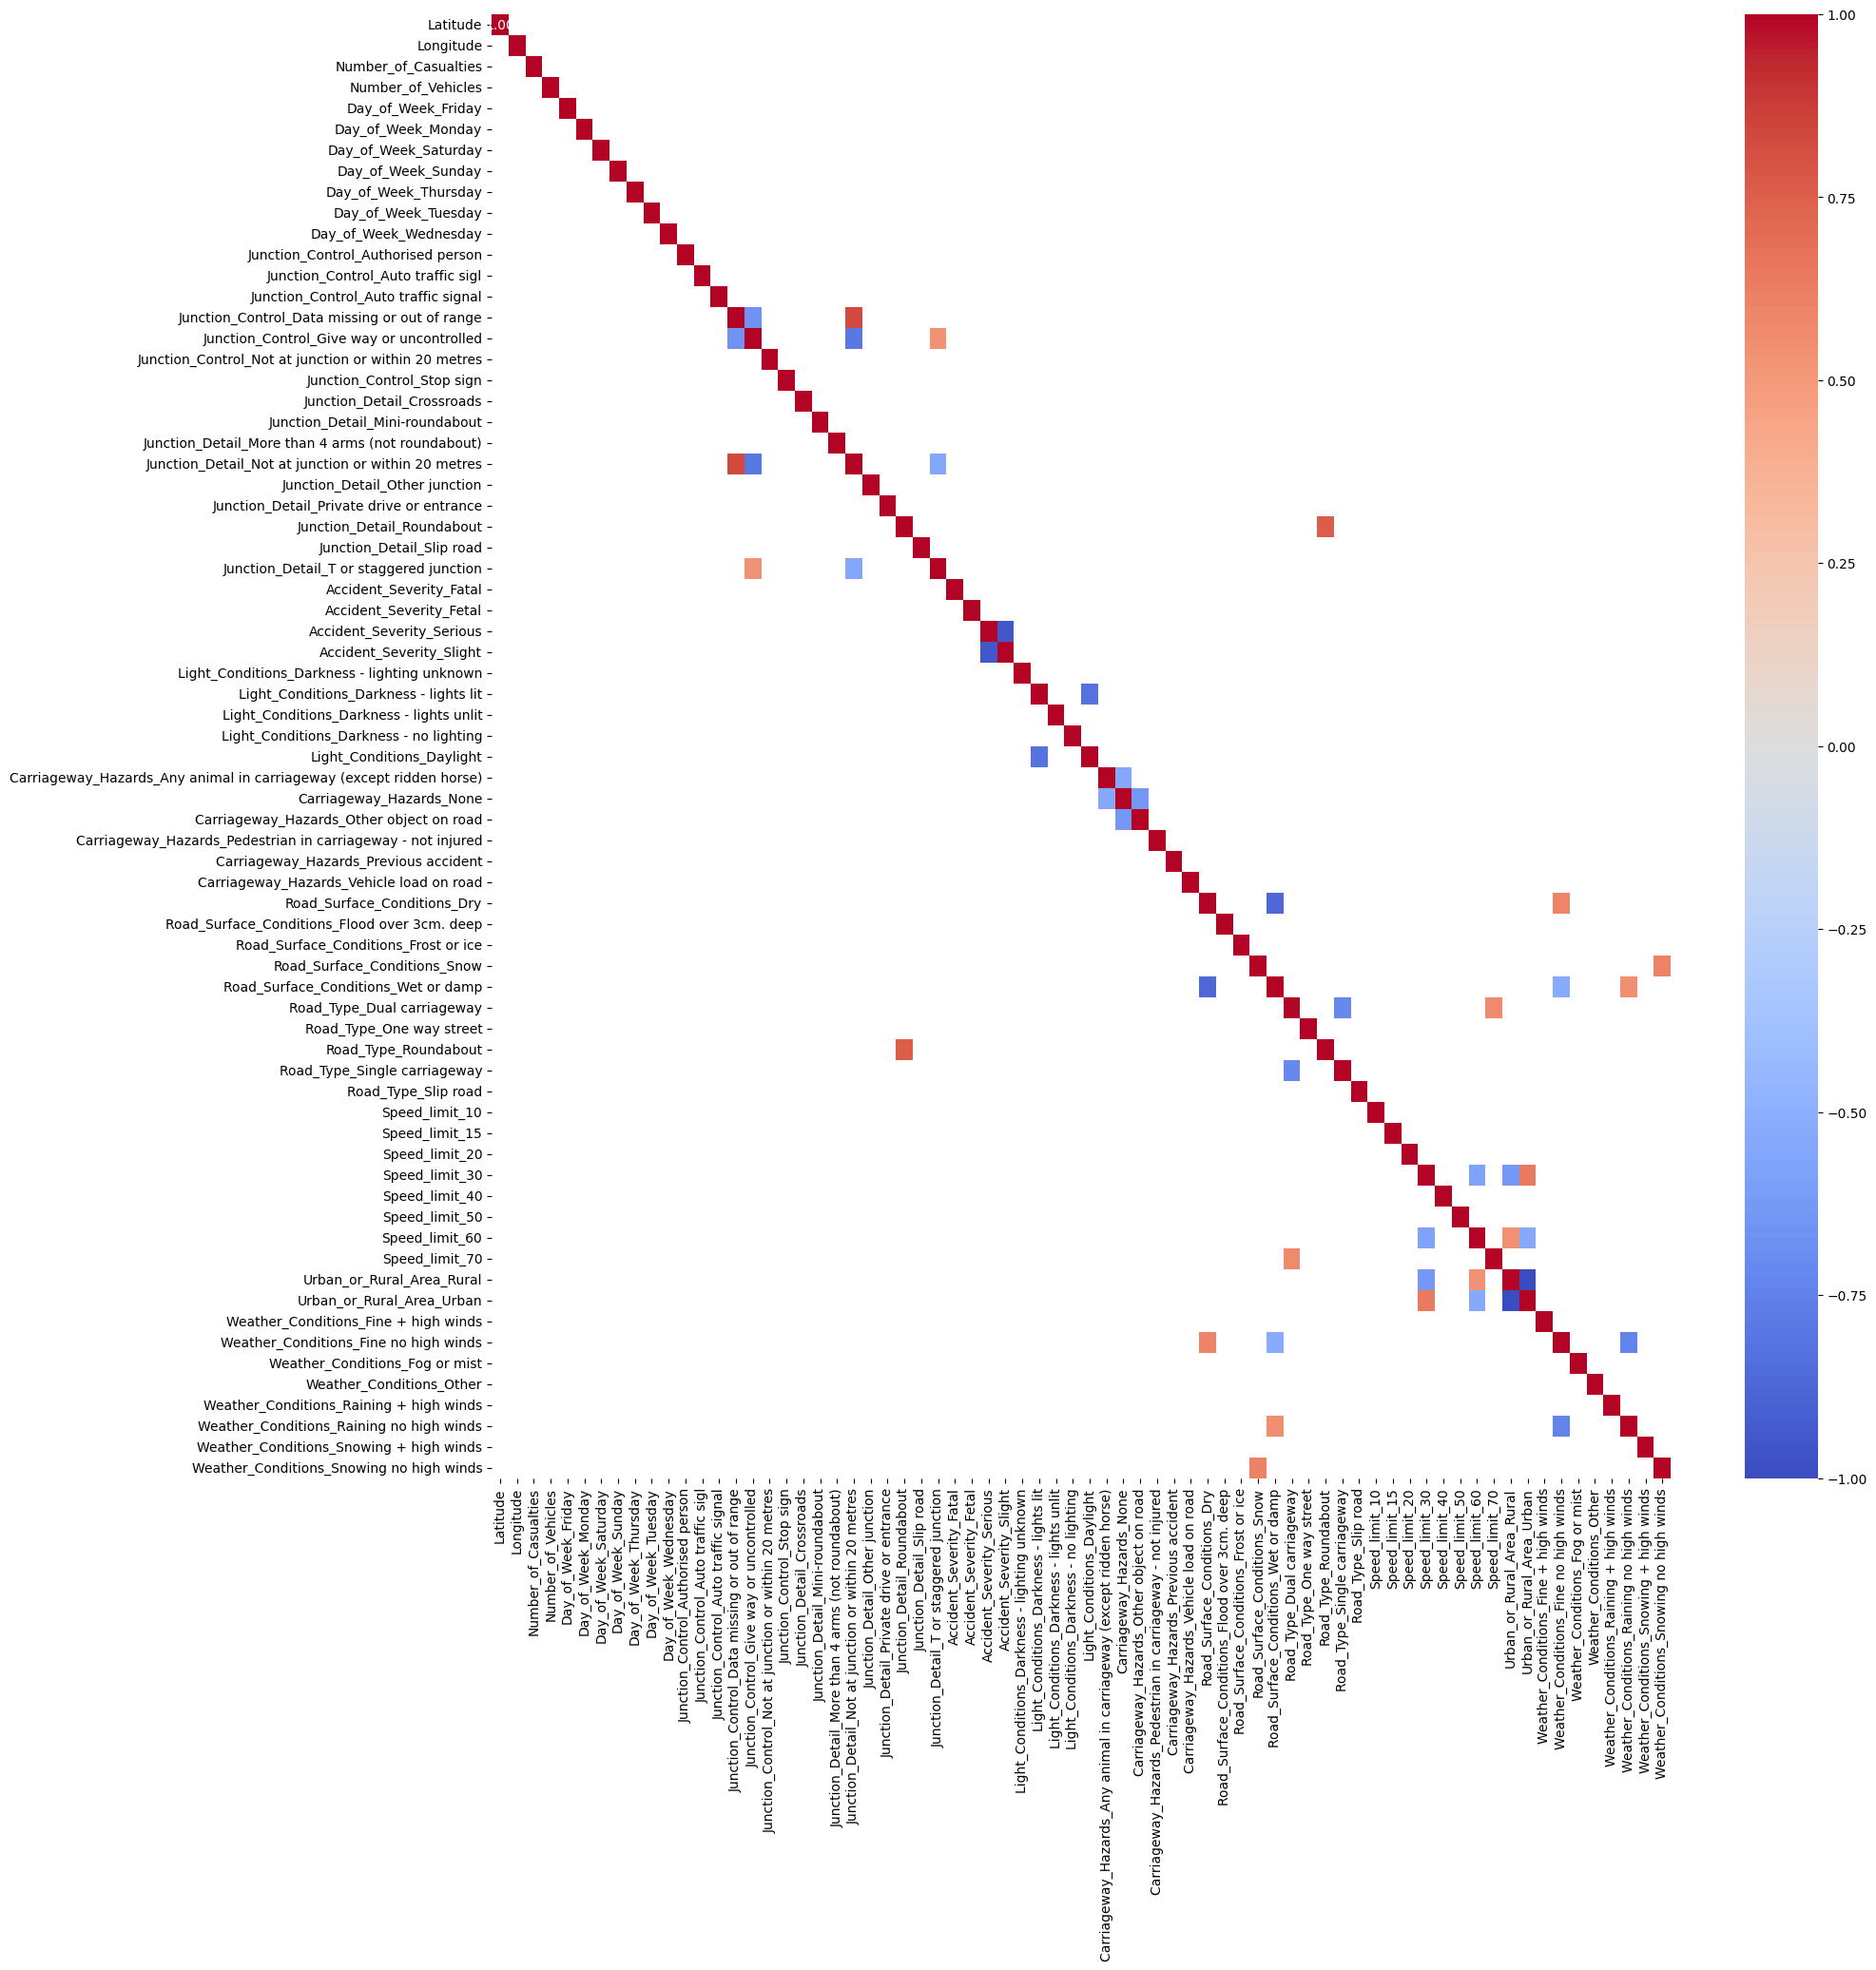

In [43]:
# Create a mask for insignificant correlations
mask = (corr_matrix > 0.5) | (corr_matrix < -0.5)

# Apply the mask to the correlation matrix
filtered_corr_matrix = corr_matrix[mask]

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

C:\Users\Bhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


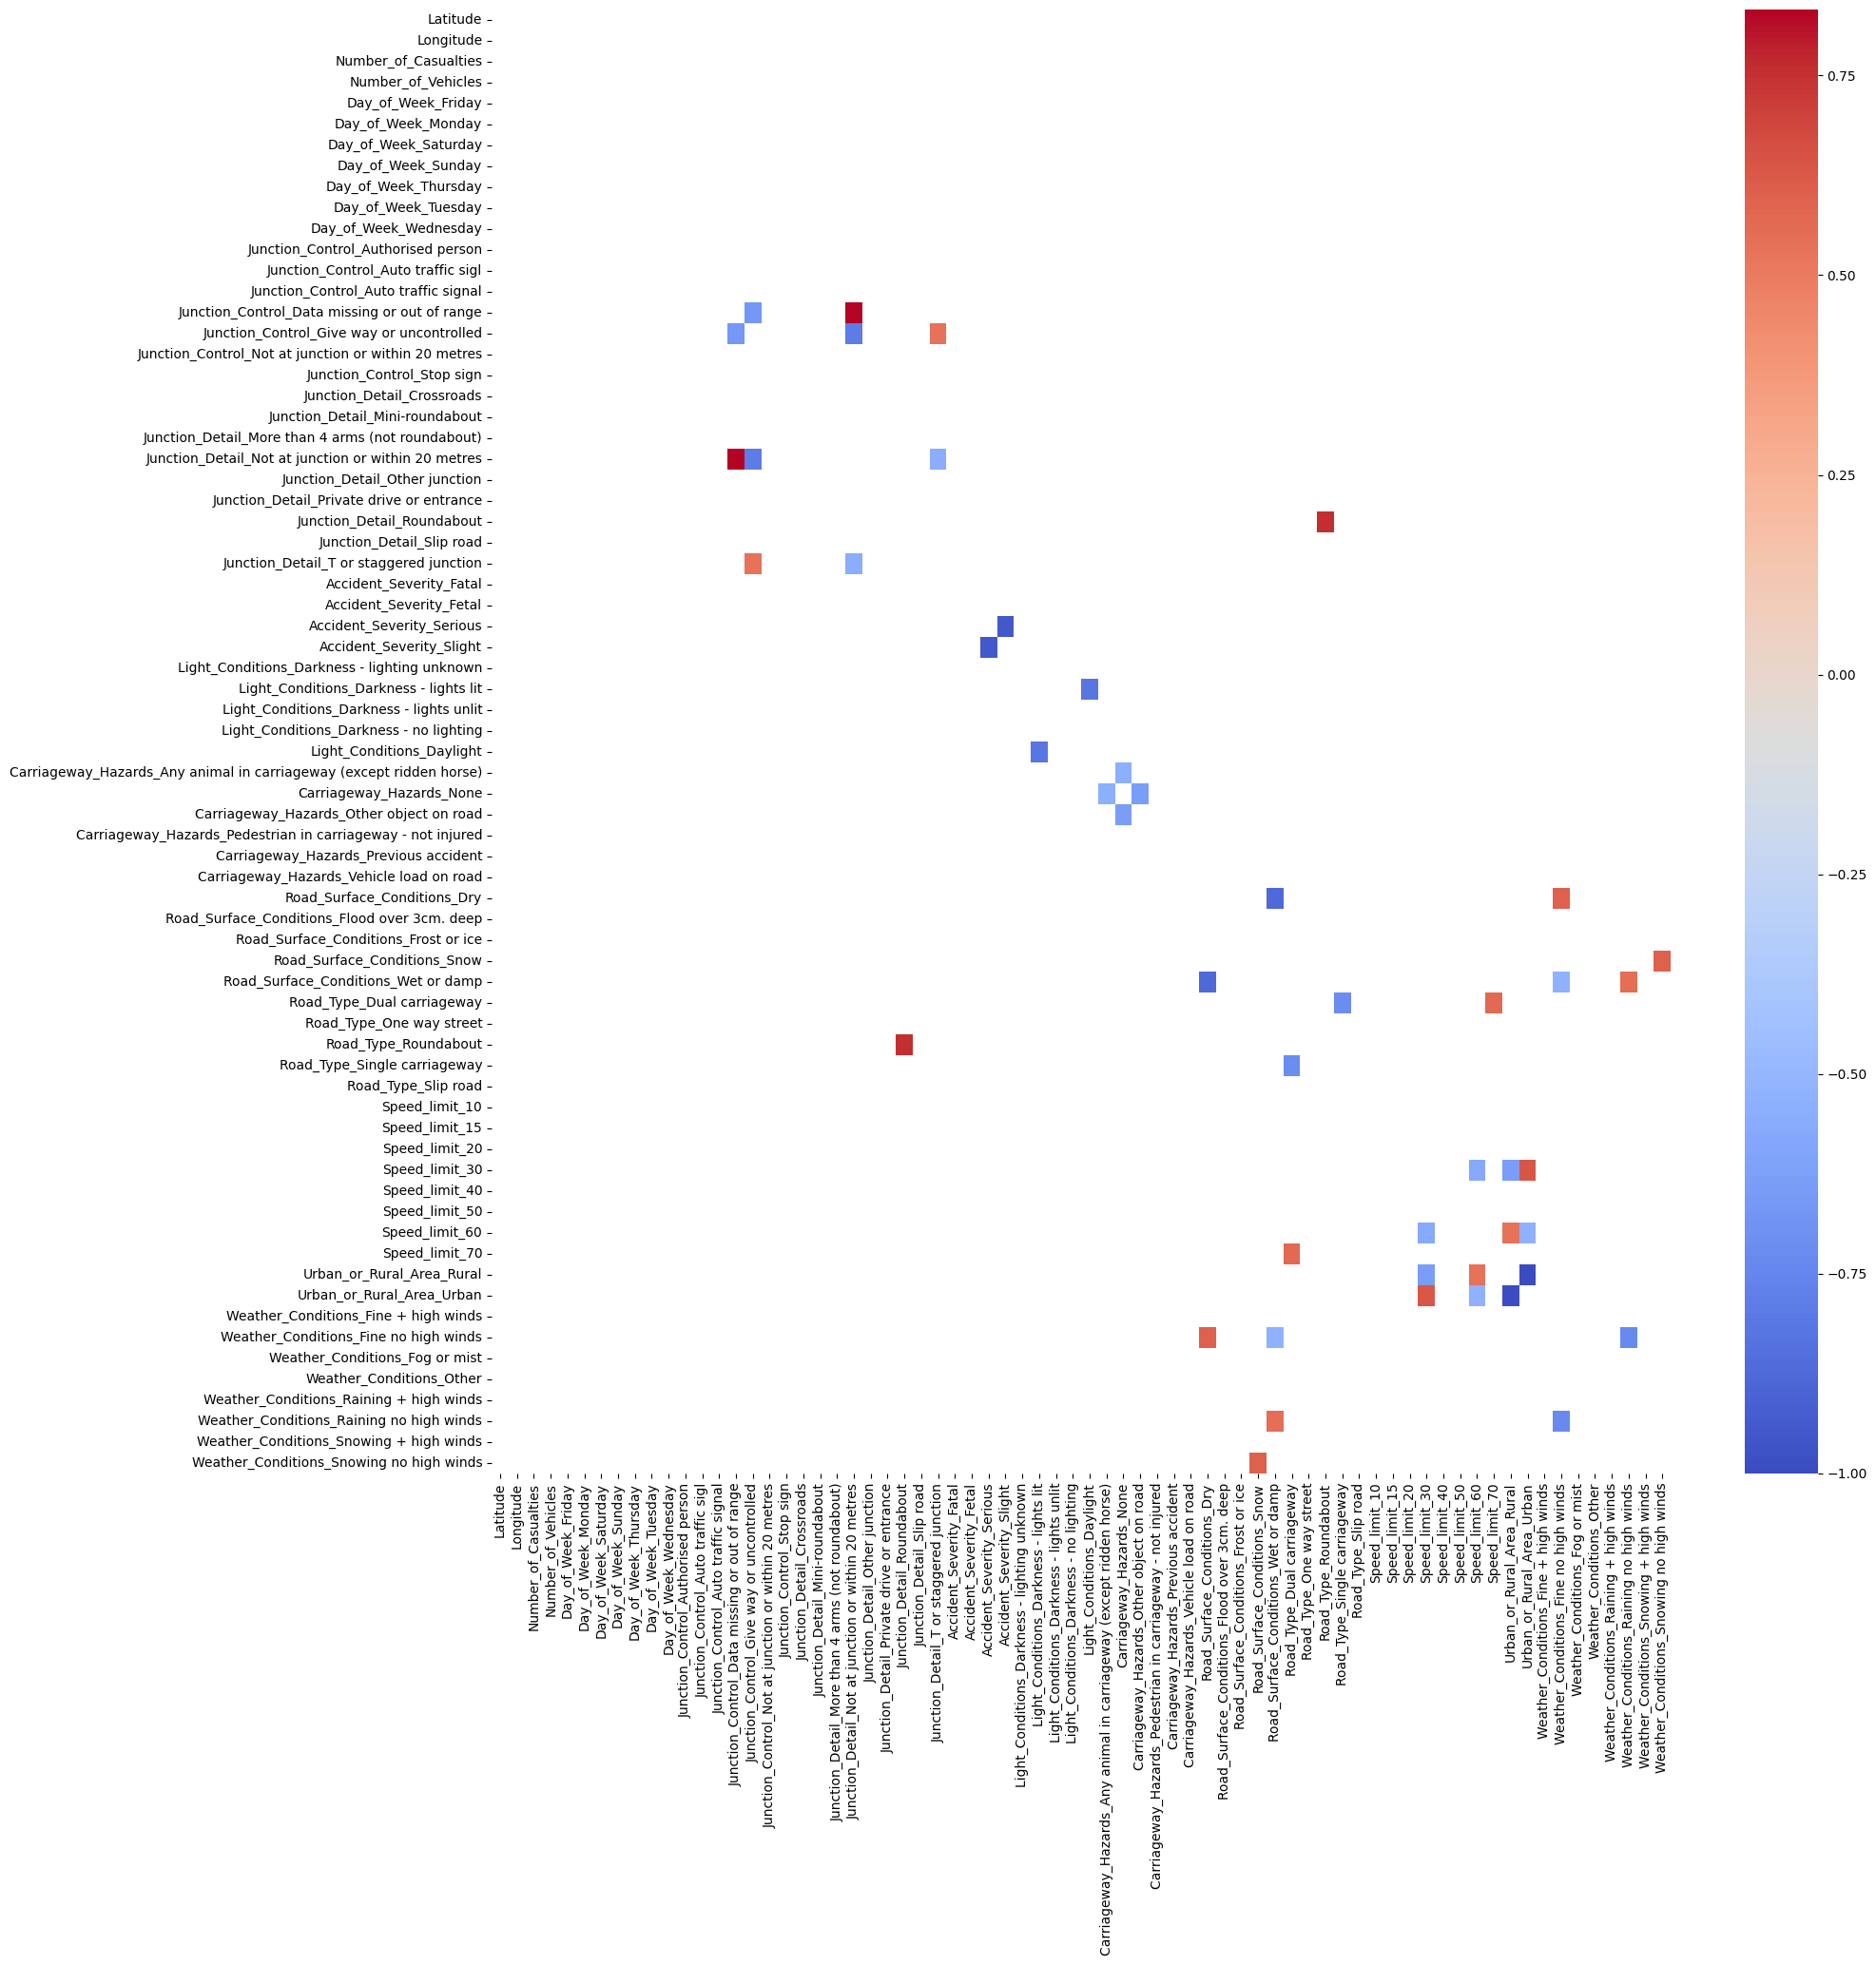

In [44]:
import numpy as np

# Create a mask for insignificant correlations
mask = (corr_matrix > 0.5) | (corr_matrix < -0.5)

# Set the diagonal to False
np.fill_diagonal(mask.values, False)

# Apply the mask to the correlation matrix
filtered_corr_matrix = corr_matrix[mask]

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

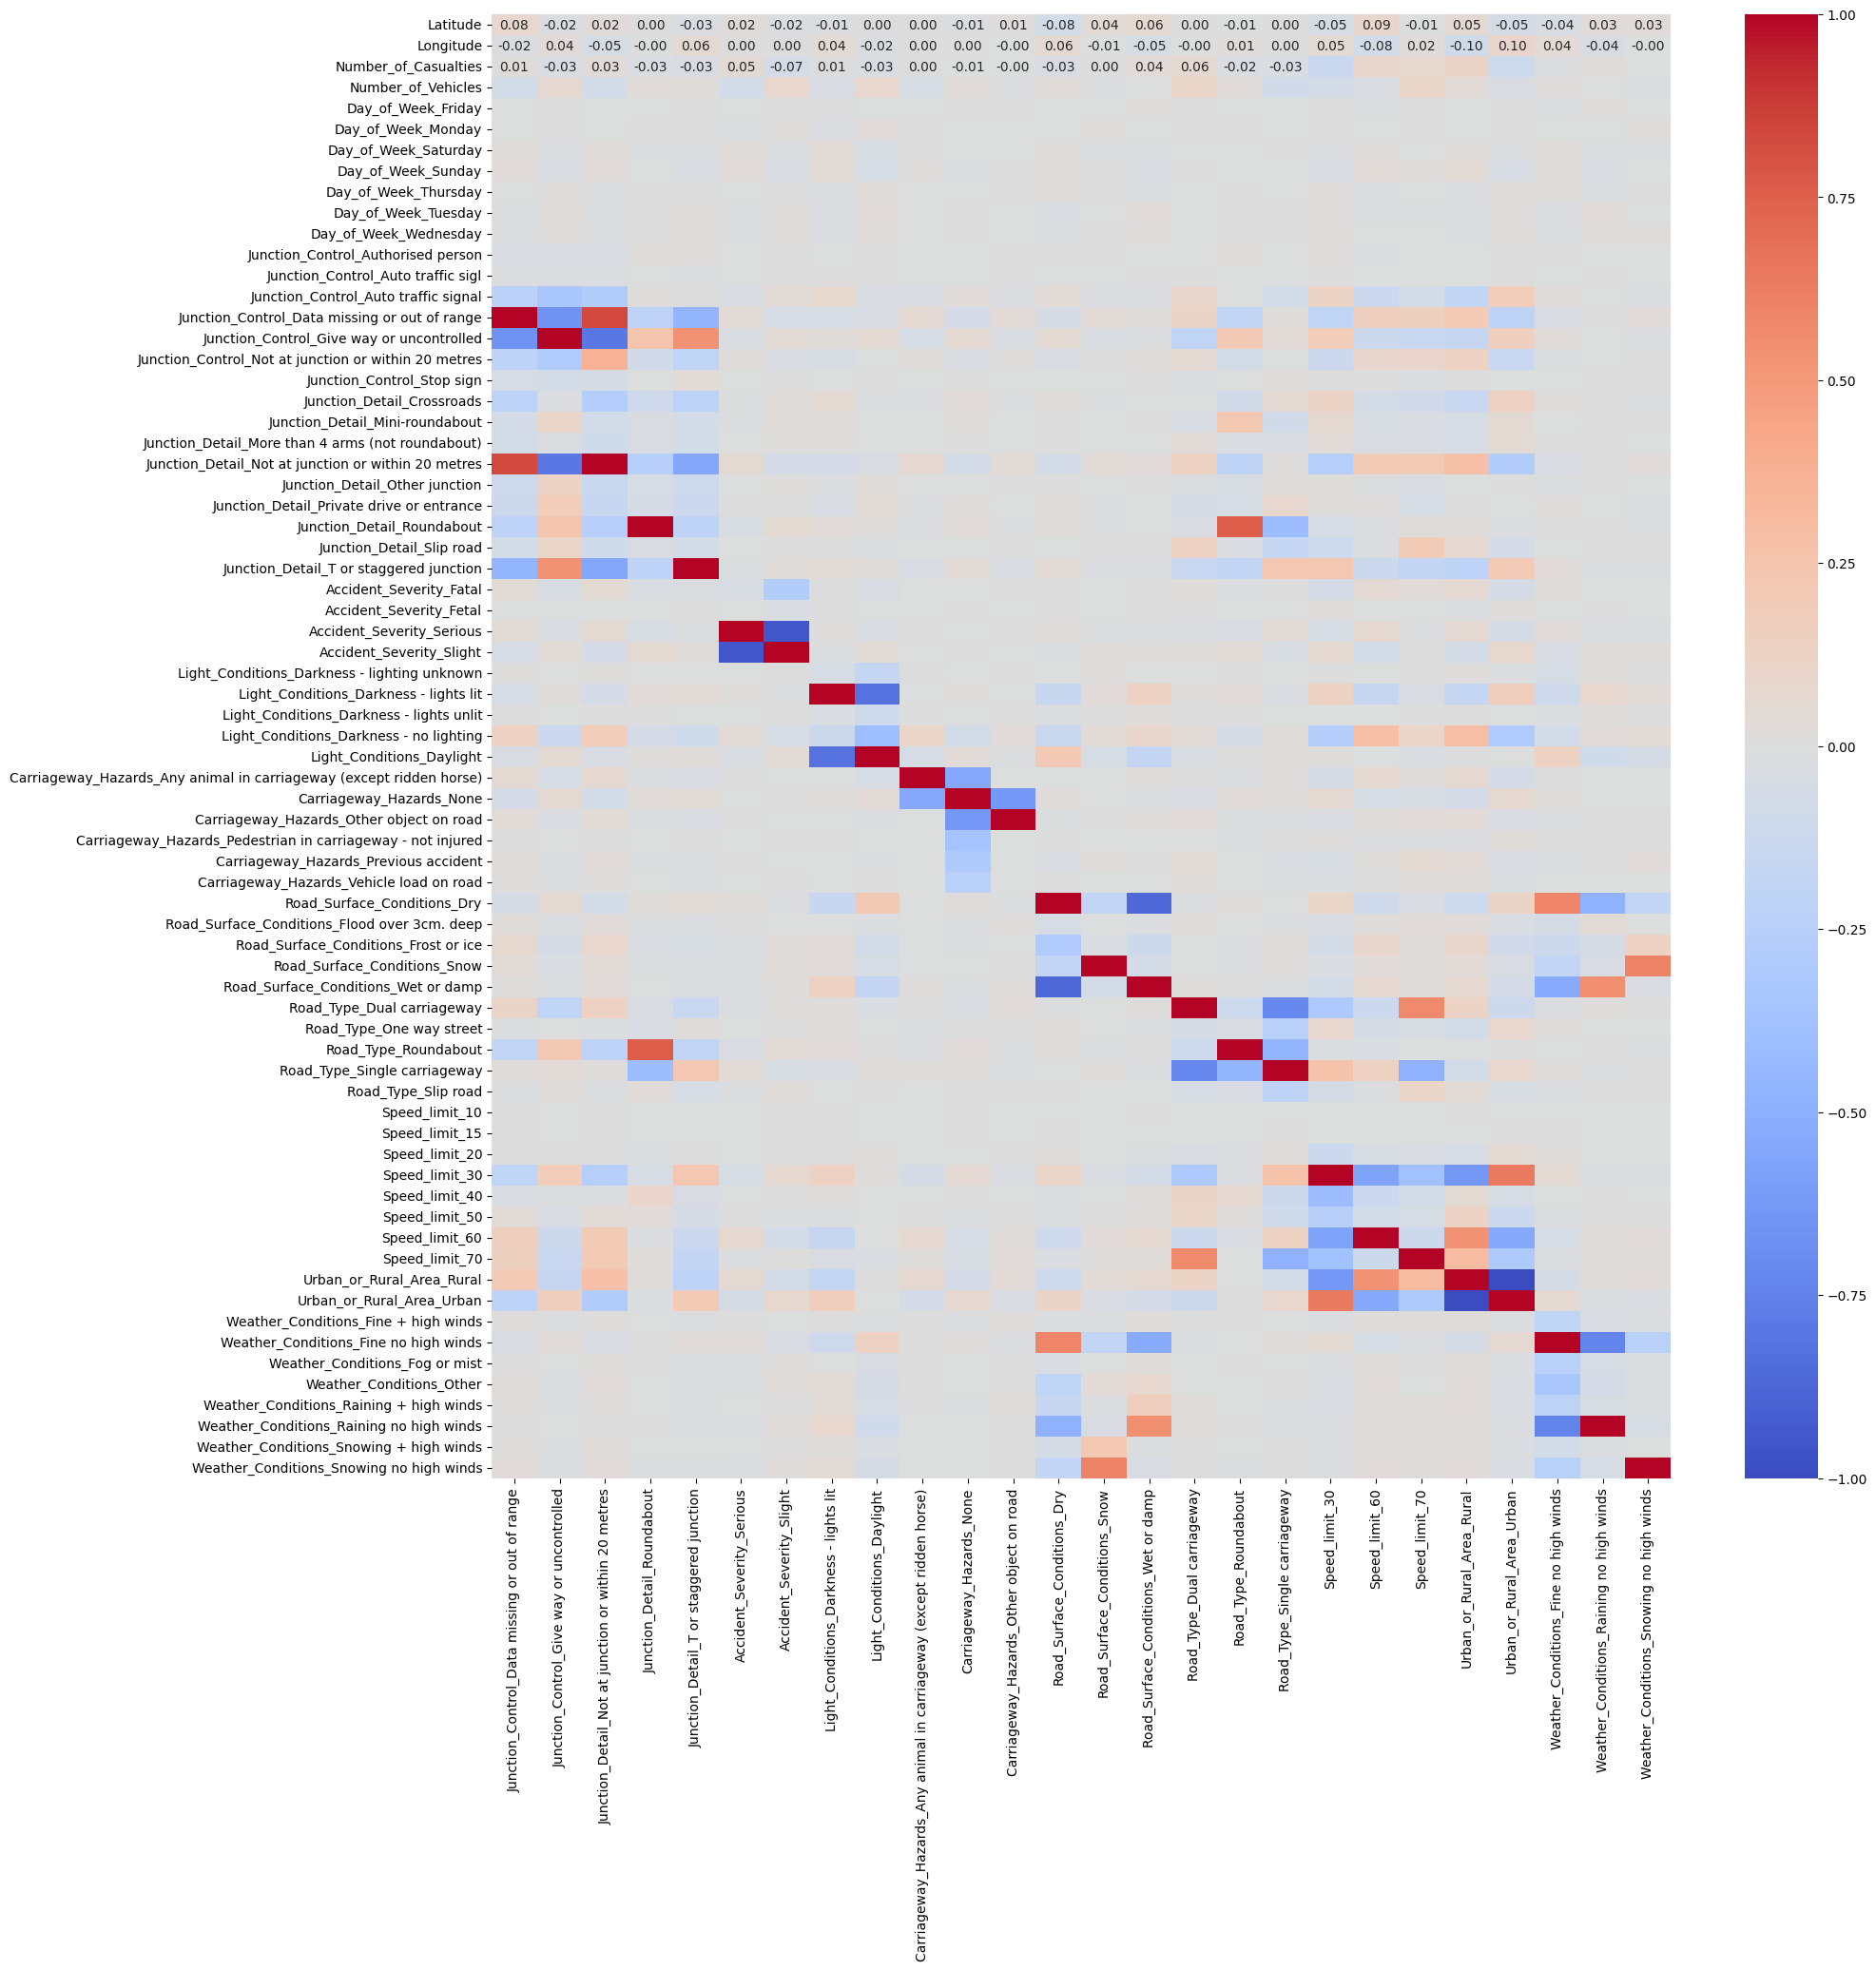

In [45]:
import numpy as np

# Create a mask for insignificant correlations
mask = (corr_matrix > 0.5) | (corr_matrix < -0.5)

# Set the diagonal to False
np.fill_diagonal(mask.values, False)

# Remove columns that do not have any significant correlation with any other column
mask = mask.loc[:, mask.any()]

# Apply the mask to the correlation matrix
filtered_corr_matrix = corr_matrix.loc[mask.index, mask.columns]

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

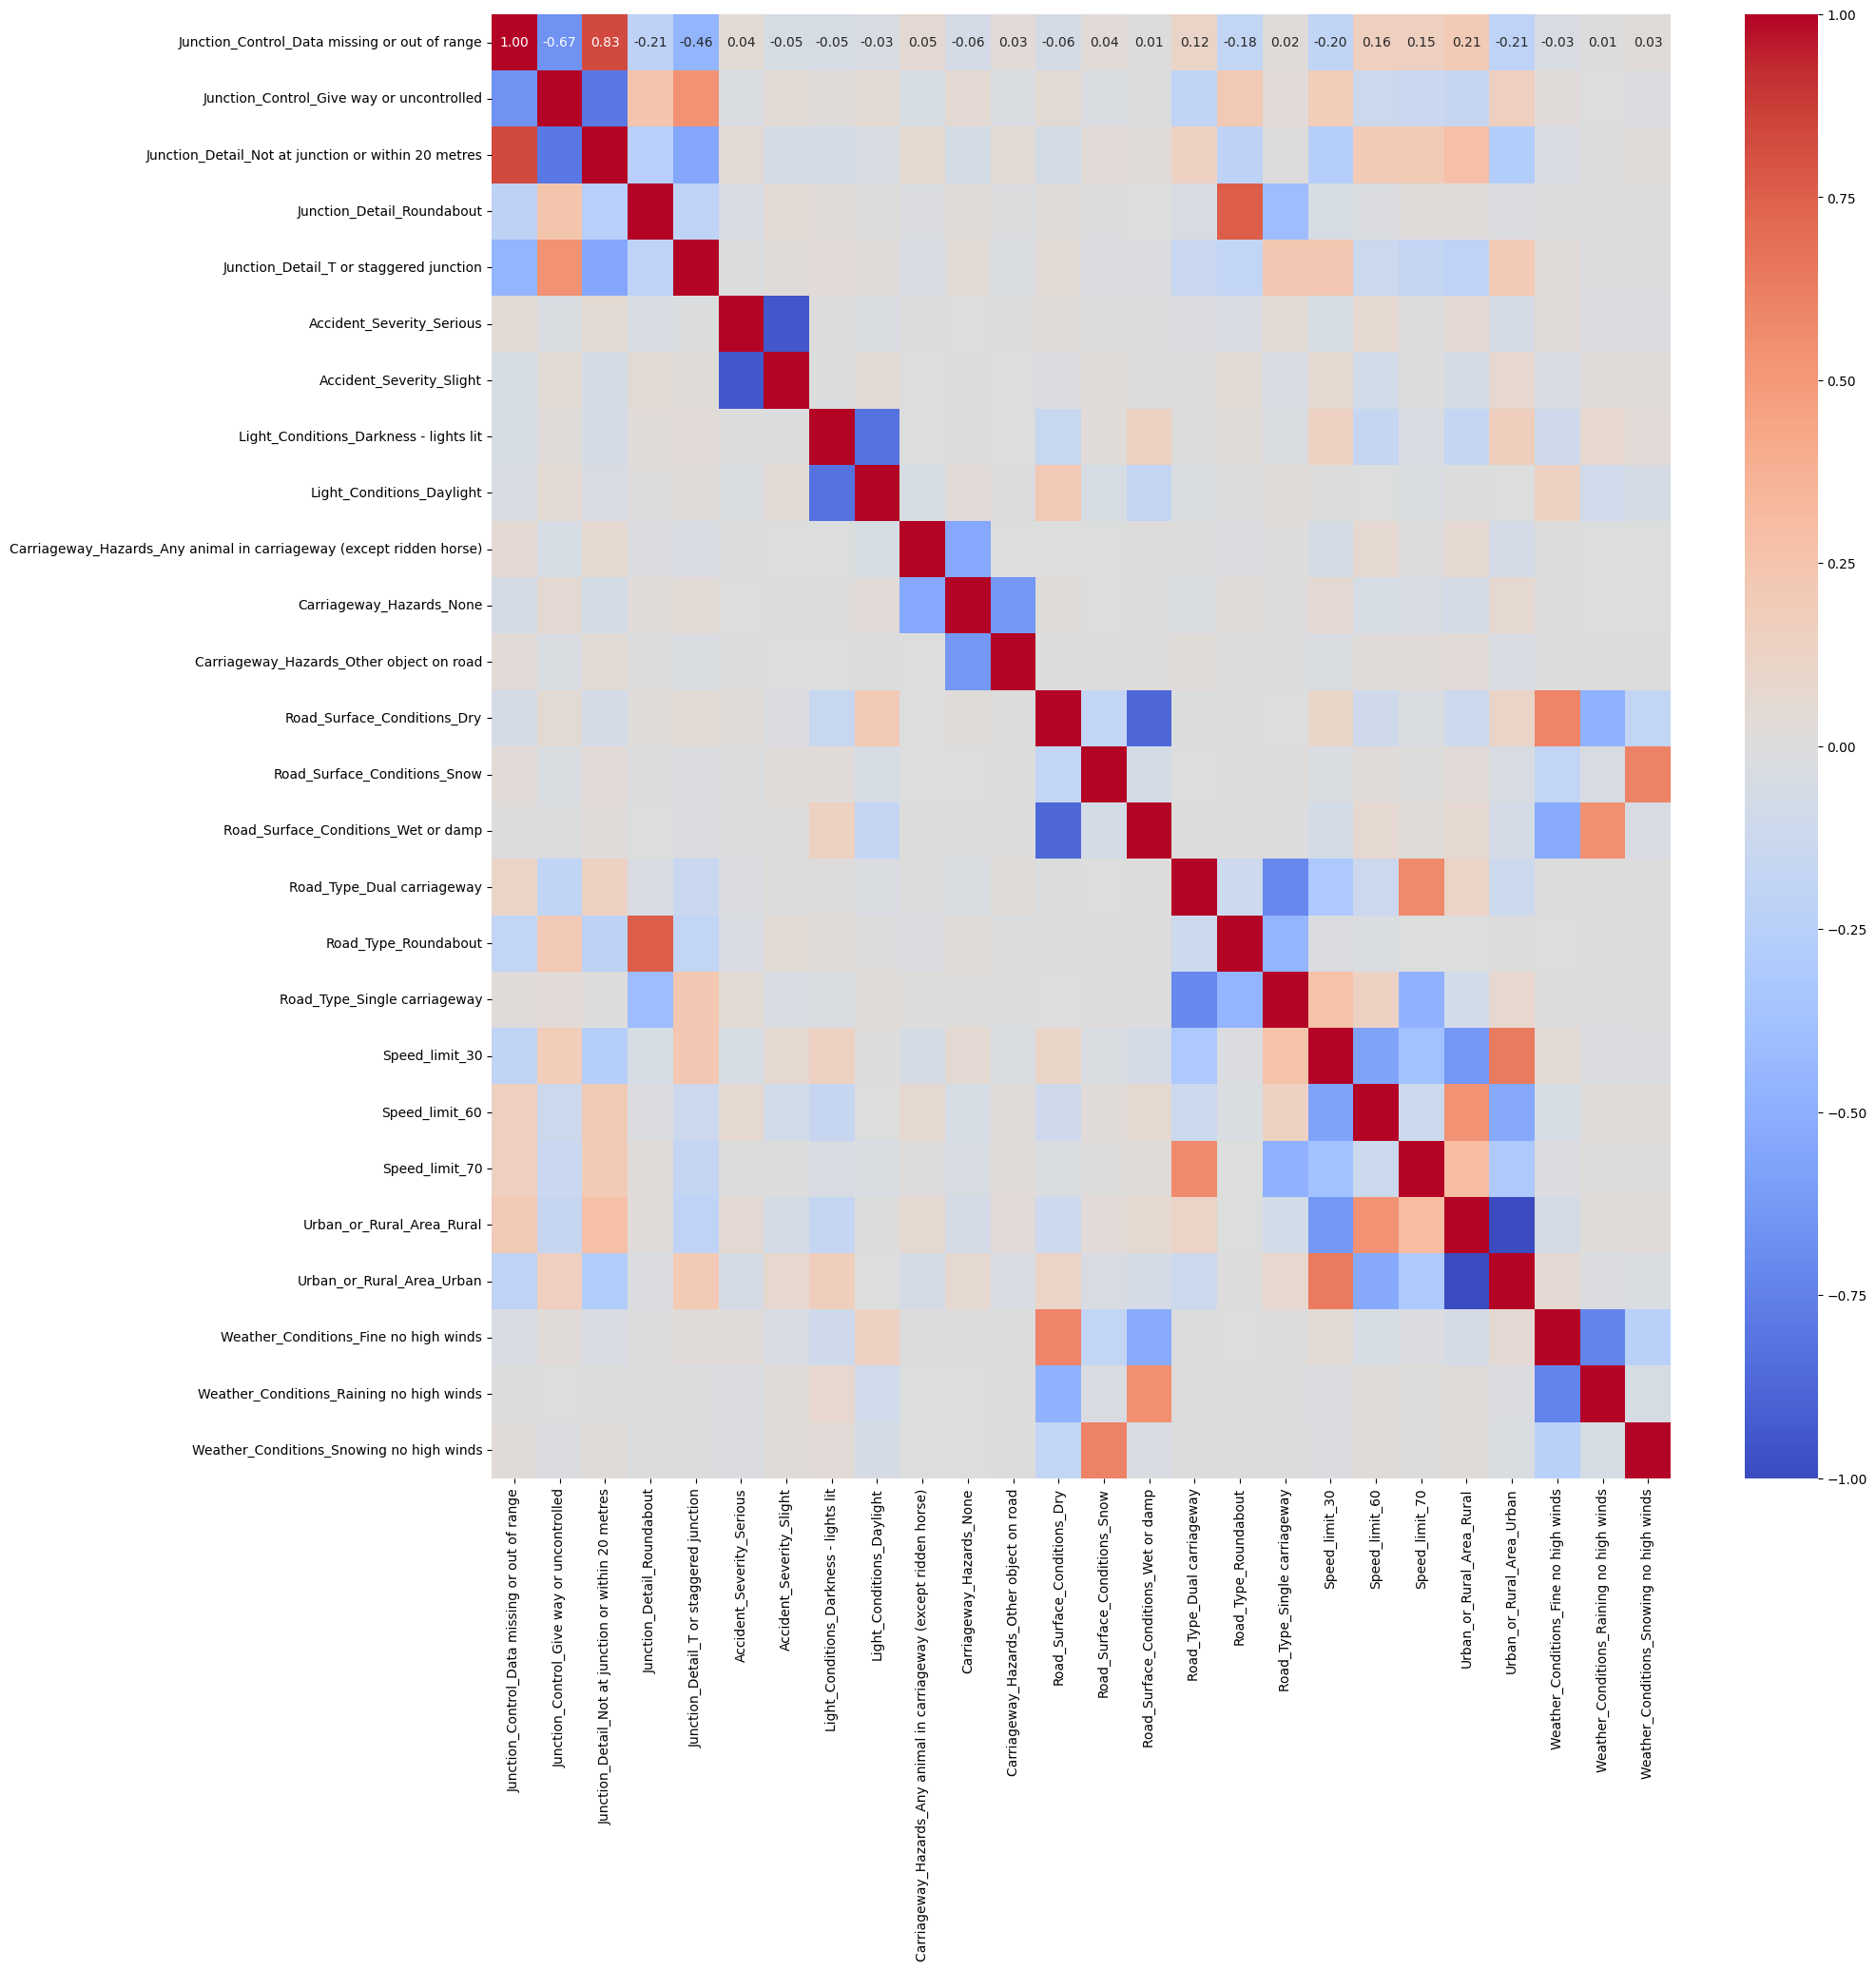

In [46]:
import numpy as np

# Create a mask for insignificant correlations
mask = (corr_matrix > 0.5) | (corr_matrix < -0.5)

# Set the diagonal to False
np.fill_diagonal(mask.values, False)

# Remove columns that do not have any significant correlation with any other column
mask = mask.loc[mask.any(), mask.any()]

# Apply the mask to the correlation matrix
filtered_corr_matrix = corr_matrix.loc[mask.index, mask.columns]

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

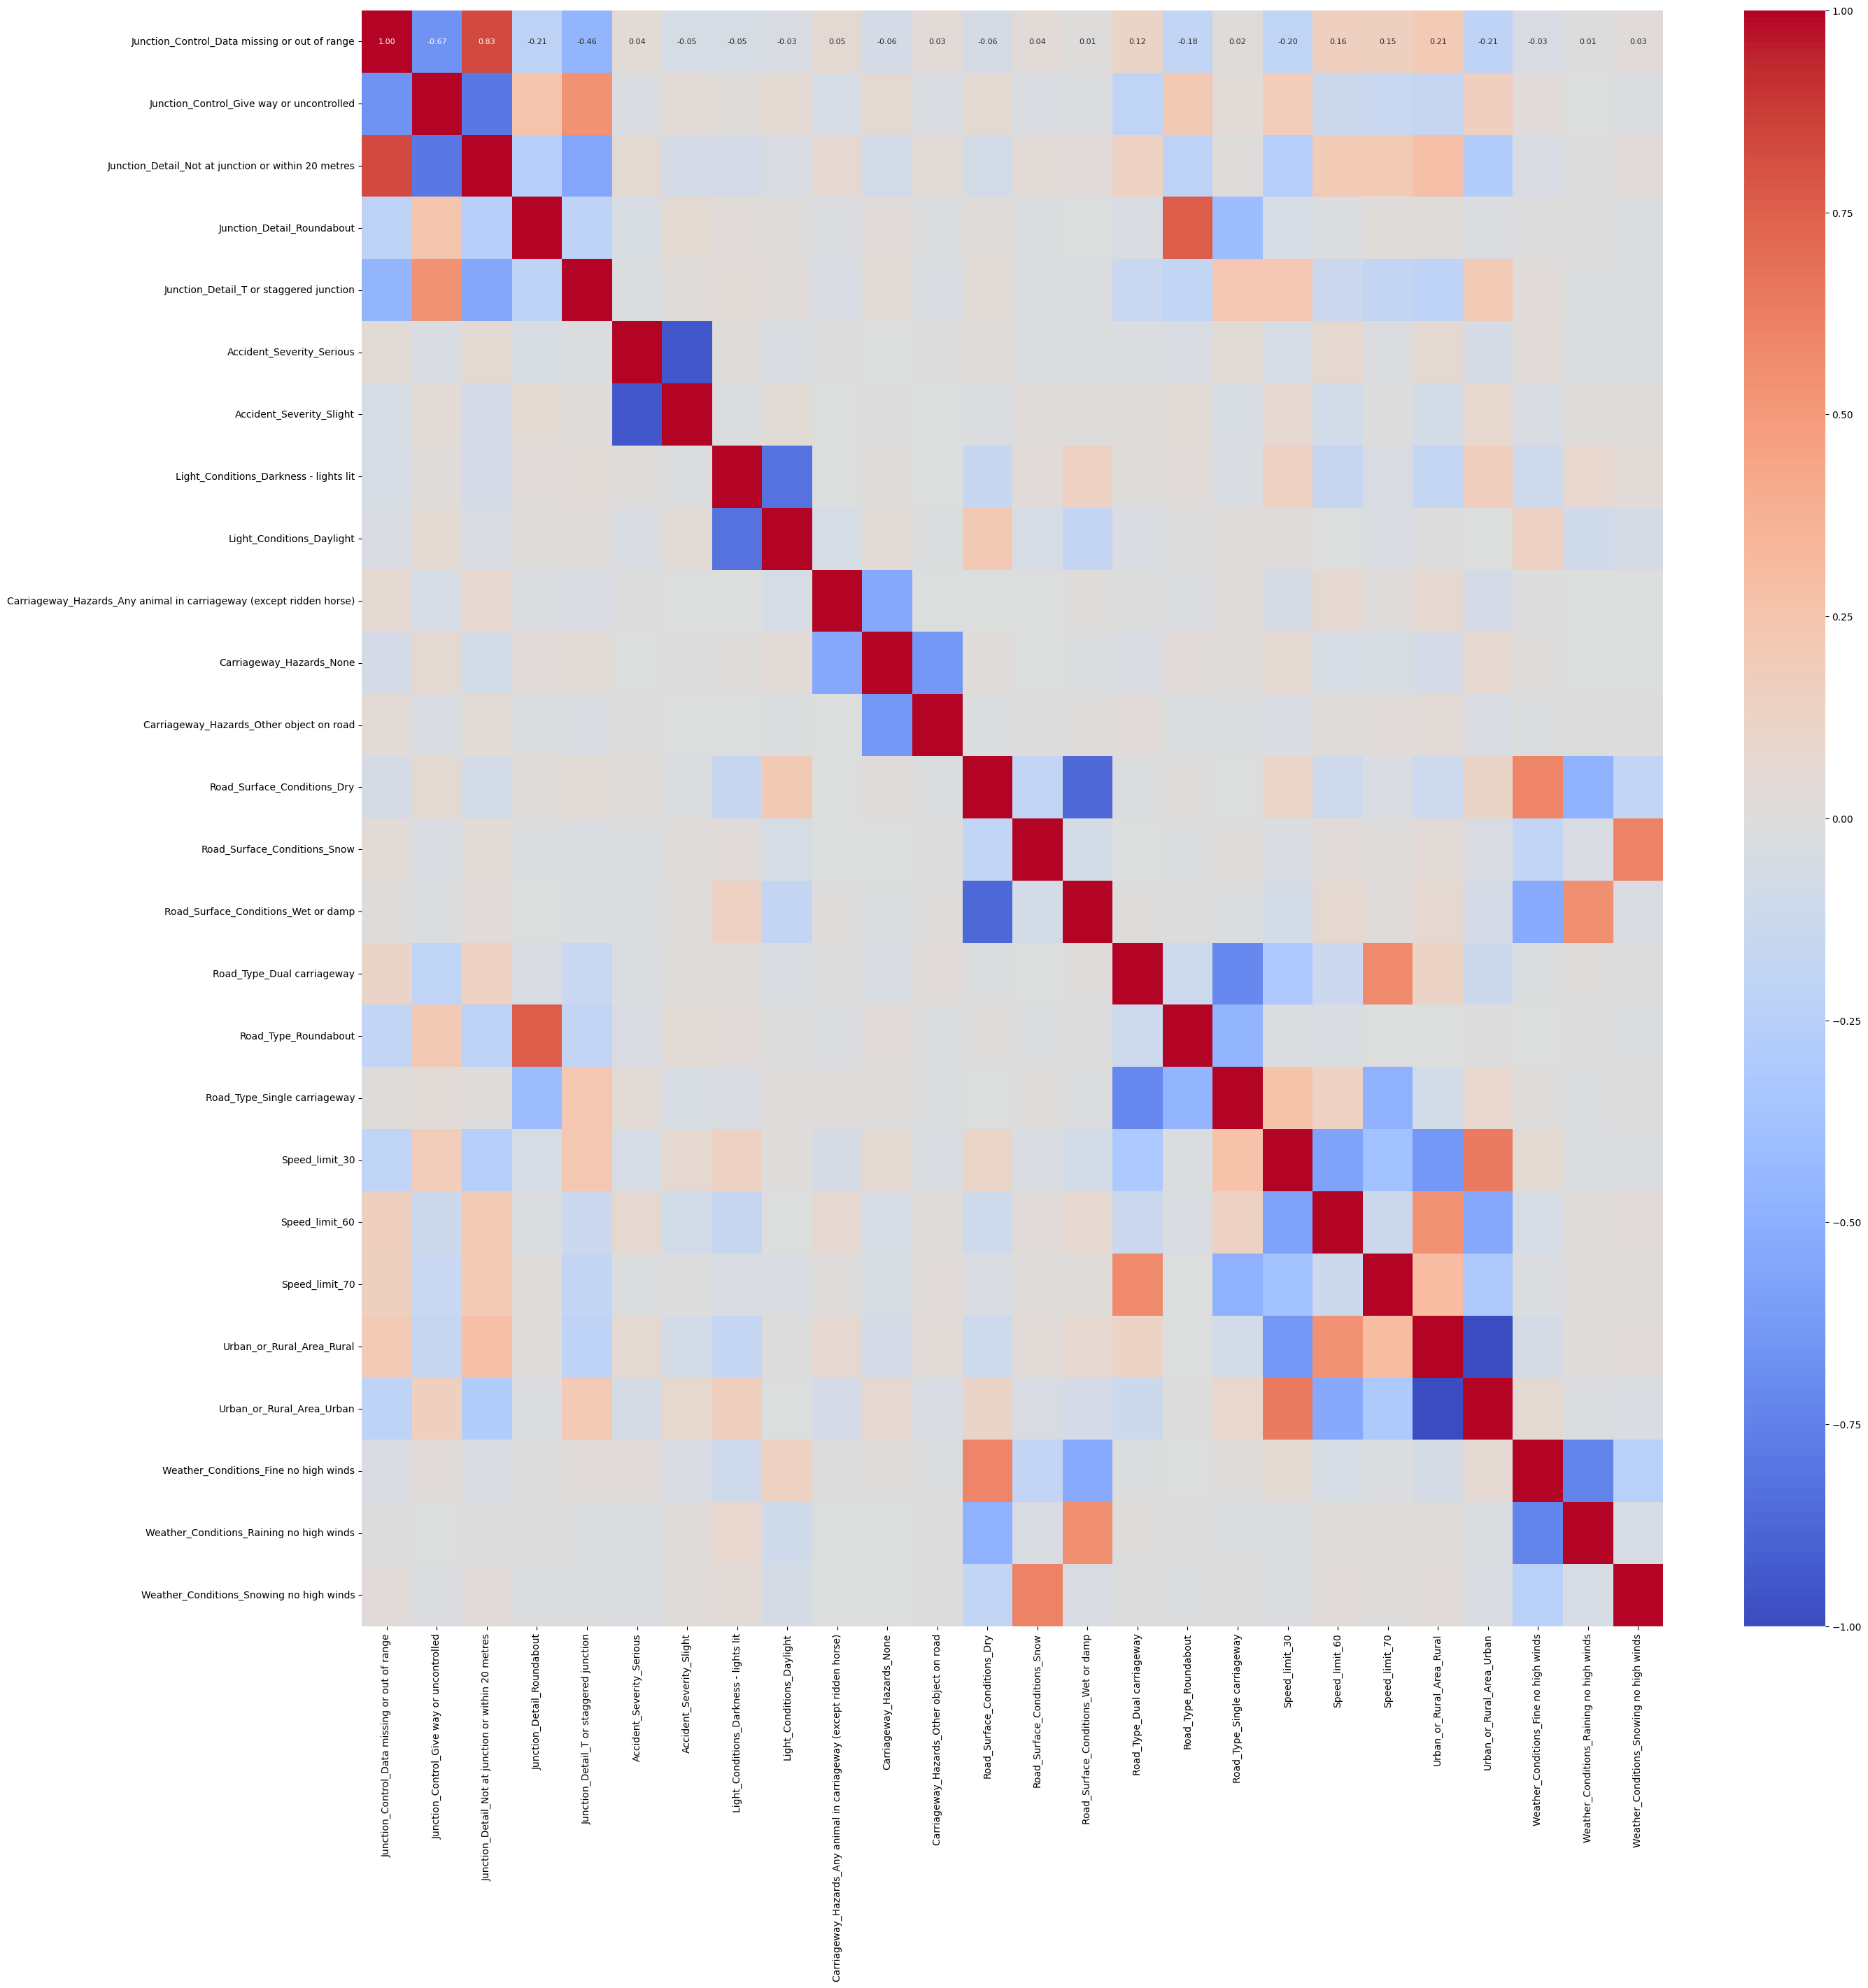

In [47]:
# Plot the heatmap with smaller annotations
plt.figure(figsize=(30, 30))  # Increase the size of the heatmap
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})  # Decrease the font size of the annotations
plt.show()

In [70]:
# Get the absolute correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Set the threshold for high correlation
threshold = 0.4

# Find the column pairs with high correlation
high_corr_pairs = abs_corr_matrix[abs_corr_matrix > threshold].stack().reset_index()
high_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1'] < high_corr_pairs['Column 2']]

# Split the column names at the last underscore and select the first part
high_corr_pairs['Column 1 Split'] = high_corr_pairs['Column 1'].apply(lambda x: x.rsplit('_', 1)[0])
high_corr_pairs['Column 2 Split'] = high_corr_pairs['Column 2'].apply(lambda x: x.rsplit('_', 1)[0])

# Remove pairs where the column names up to the last underscore are matching
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1 Split'] != high_corr_pairs['Column 2 Split']]

# Drop the temporary columns
high_corr_pairs = high_corr_pairs.drop(columns=['Column 1 Split', 'Column 2 Split'])

high_corr_pairs

Column 1  \
14            Junction_Control_Auto traffic signal   
17   Junction_Control_Data missing or out of range   
18   Junction_Control_Data missing or out of range   
21       Junction_Control_Give way or uncontrolled   
22       Junction_Control_Give way or uncontrolled   
36                      Junction_Detail_Roundabout   
37                      Junction_Detail_Roundabout   
68                     Road_Surface_Conditions_Dry   
69                     Road_Surface_Conditions_Dry   
73                    Road_Surface_Conditions_Snow   
76             Road_Surface_Conditions_Wet or damp   
77             Road_Surface_Conditions_Wet or damp   
80                      Road_Type_Dual carriageway   
89                    Road_Type_Single carriageway   
97                                  Speed_limit_30   
98                                  Speed_limit_30   
104                                 Speed_limit_60   
105                                 Speed_limit_60   

                                              Column 2  Correlation  
14                          Junction_Detail_Crossroads     0.428980  
17   Junction_Detail_Not at junction or within 20 m...     0.832638  
18             Junction_Detail_T or staggered junction     0.462449  
21   Junction_Detail_Not at junction or within 20 m...     0.795292  
22             Junction_Detail_T or staggered junction     0.534812  
36                                Road_Type_Roundabout     0.757923  
37                        Road_Type_Single carriageway     0.408959  
68               Weather_Conditions_Fine no high winds     0.598925  
69            Weather_Conditions_Raining no high winds     0.490597  
73            Weather_Conditions_Snowing no high winds     0.602773  
76               Weather_Conditions_Fine no high winds     0.524296  
77            Weather_Conditions_Raining no high winds     0.551135  
80                                      Speed_limit_70     0.573786  
89                                      Speed_limit_70     0.483112  
97                           Urban_or_Rural_Area_Rural     0.636760  
98                           Urban_or_Rural_Area_Urban     0.636760  
104                          Urban_or_Rural_Area_Rural     0.532901  
105                          Urban_or_Rural_Area_Urban     0.532901

In [ ]:
# Get the absolute correlation matrix
abs_corr_matrix = corr_matrix.abs()

# Set the threshold for high correlation
threshold = 0.5

# Find the column pairs with high correlation
high_corr_pairs = abs_corr_matrix[abs_corr_matrix > threshold].stack().reset_index()
high_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

# Remove duplicates
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1'] < high_corr_pairs['Column 2']]

# Split the column names at the last underscore and select the first part
high_corr_pairs['Column 1 Split'] = high_corr_pairs['Column 1'].apply(lambda x: x.rsplit('_', 1)[0])
high_corr_pairs['Column 2 Split'] = high_corr_pairs['Column 2'].apply(lambda x: x.rsplit('_', 1)[0])

# Remove pairs where the column names up to the last underscore are matching
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1 Split'] != high_corr_pairs['Column 2 Split']]

# Drop the temporary columns
high_corr_pairs = high_corr_pairs.drop(columns=['Column 1 Split', 'Column 2 Split'])

high_corr_pairs

In [ ]:
# Split the column names at the last underscore and select the first part
high_corr_pairs['Column 1 Split'] = high_corr_pairs['Column 1'].apply(lambda x: x.rsplit('_', 1)[0])
high_corr_pairs['Column 2 Split'] = high_corr_pairs['Column 2'].apply(lambda x: x.rsplit('_', 1)[0])

# Remove pairs where the column names up to the last underscore are matching
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1 Split'] != high_corr_pairs['Column 2 Split']]

# Drop the temporary columns
high_corr_pairs = high_corr_pairs.drop(columns=['Column 1 Split', 'Column 2 Split'])

high_corr_pairs.head(50)

In [ ]:
# Split the column names at the last underscore
high_corr_pairs['Column 1 Split'] = high_corr_pairs['Column 1'].str.rsplit('_', 1)
high_corr_pairs['Column 2 Split'] = high_corr_pairs['Column 2'].str.rsplit('_', 1)

# Select the first element of the split result
high_corr_pairs['Column 1 Split'] = high_corr_pairs['Column 1 Split'].str[0]
high_corr_pairs['Column 2 Split'] = high_corr_pairs['Column 2 Split'].str[0]

# Remove pairs where the column names up to the last underscore are matching
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1 Split'] != high_corr_pairs['Column 2 Split']]

# Drop the temporary columns
high_corr_pairs = high_corr_pairs.drop(columns=['Column 1 Split', 'Column 2 Split'])

high_corr_pairs.head(50)